# Personalized User-level DP

In [1]:
import numpy as np

import os
path_project = os.path.dirname(os.path.abspath('.'))
import sys
sys.path.append(os.path.join(path_project, 'src'))
sys.path.append(os.path.join(path_project, 'exp/script'))

img_path = os.path.join(path_project, 'exp', 'img')
pickle_path = os.path.join(path_project, 'exp', 'pickle')
results_path = os.path.join(path_project, 'exp', 'results')

from personalized_utils import (
    init_heart_disease_param, init_mnist_param,
    make_q_c_curve, plot_q_c_curve, 
    static_optimization, show_static_optimization_result,
    prepare_grid_search,
    run_online_optimization, show_online_optimization_result,
    run_with_specified_idx, show_specified_idx_result,
    plot_acc_results,
)
from mylogger import logger_set_warning, logger_set_info


# qC curve

Given following parameters, the q C pair satisfying the privacy constraint has many candidates
- epsilon_u
- delta
- n_round
- sigma


Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/q_c_pair-example.png


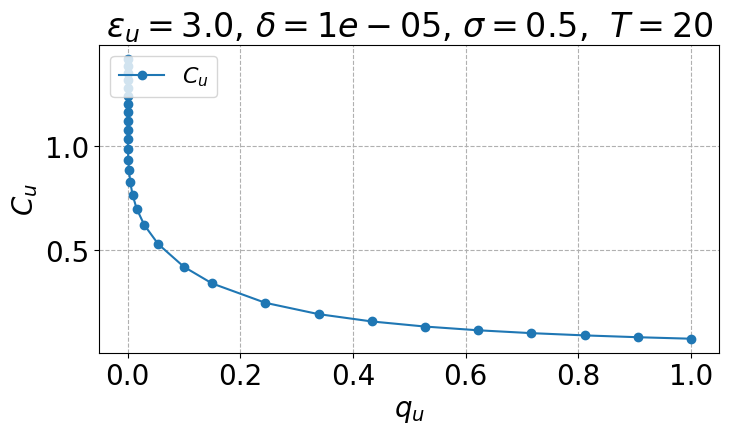

In [2]:
# Figure of q_c_pair.png
epsilon_u = 3.0
n_total_round = 20
delta = 1e-5
sigma = 0.5
x, y = make_q_c_curve(epsilon_u=epsilon_u, delta=delta, sigma=sigma, num_points=30, n_total_round=n_total_round, min=-6)
plot_q_c_curve(
    x, y,
    title=r"$\epsilon_u={}$, $\delta={}$, $\sigma={}$,  $T={}$".format(
                epsilon_u, delta, sigma, n_total_round,
            )
)

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/q_c_pair-example-qc.png


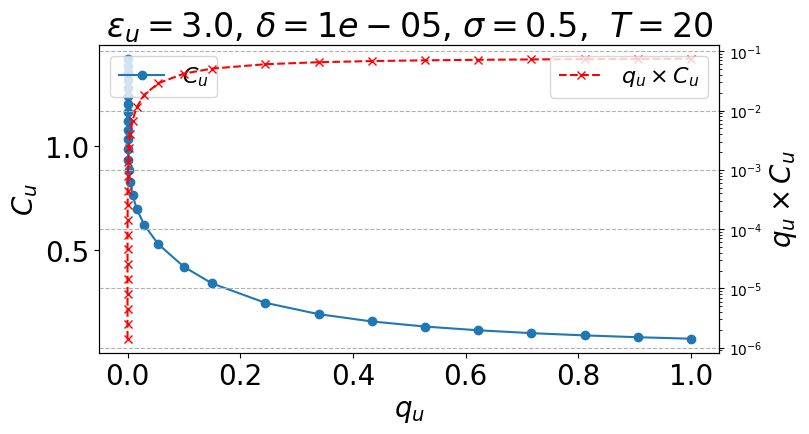

In [3]:
# Figure of q_c_pair.png
epsilon_u = 3.0
n_total_round = 20
delta = 1e-5
sigma = 0.5
x, y = make_q_c_curve(epsilon_u=epsilon_u, delta=delta, sigma=sigma, num_points=30, n_total_round=n_total_round, min=-6)
plot_q_c_curve(
    x, y,
    title=r"$\epsilon_u={}$, $\delta={}$, $\sigma={}$,  $T={}$".format(
                epsilon_u, delta, sigma, n_total_round,
            ), is_qC=True,
)

# PULDP-AVG

## Offline HPO

### HeartDisease

#### Parameters

#### QCGridSearch (Test with all of HPs for showing group-independency, Figure in Appendix)

Basic setting 

(This setup is close to the real world, and each group has a different number of users and different privacy budgets, so the optimal HP is likely to be different.)

- (eps1, eps2, eps3) = (0.15, 3.0, 5.0)
- with ratio (eps1, eps2, eps3) = (0.6, 0.25, 0.15)

static_optimization_512c3287df2caba17fe9c88a29f33379.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group0-heart_disease-all.png


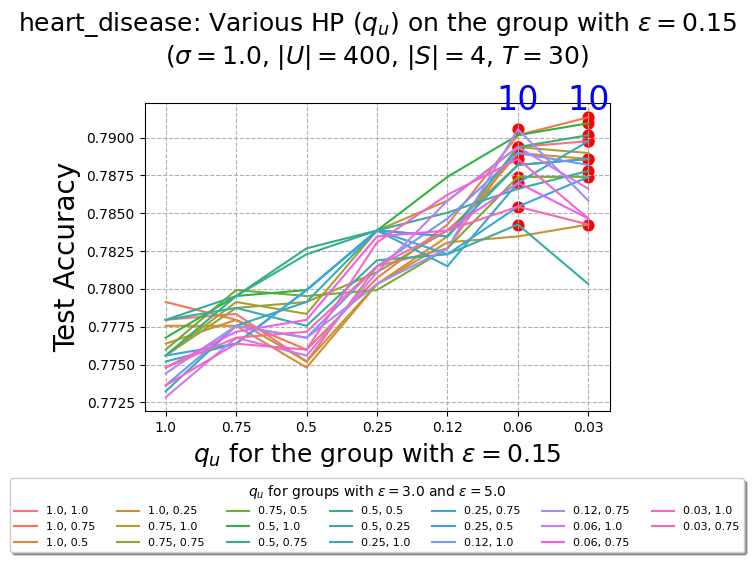

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group1-heart_disease-all.png


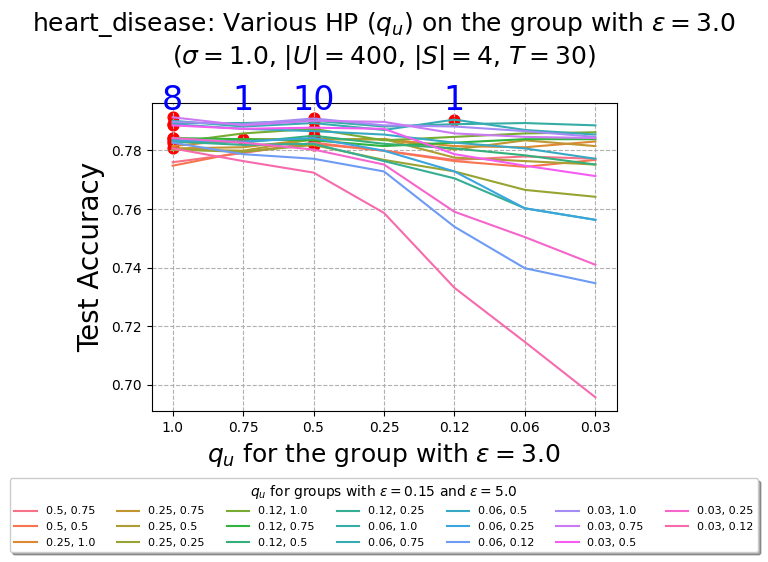

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group2-heart_disease-all.png


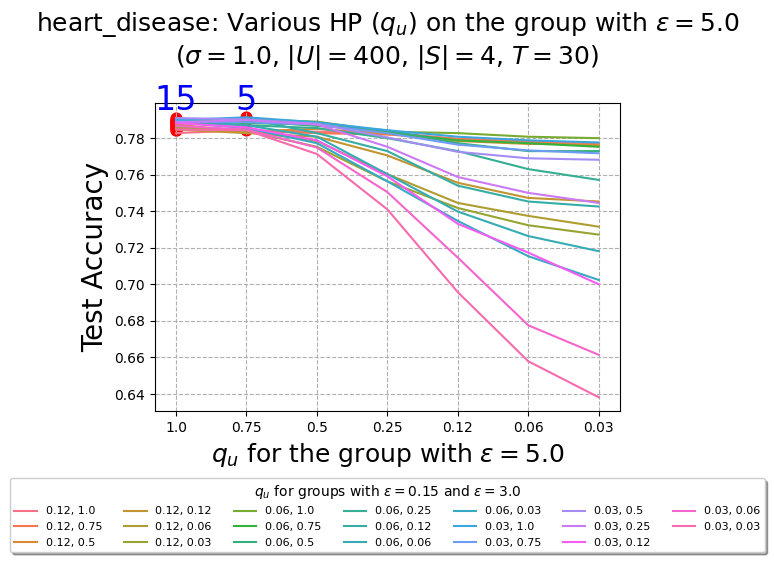

Max Metric: 0.7913385826771654 at {0.15: 6, 3.0: 0, 5.0: 1}
min_idx = {0.15: 4, 3.0: 0, 5.0: 0}, min_loss = 0.47097815573215485


In [4]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(eps_u=0.5, parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.n_total_round = 30
fed_sim_params.times = 10
static_q_u_list = [1.0, 0.75, 0.5, 0.25, 0.12, 0.06, 0.03]

idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=7)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"heart_disease-all", is_3d=True
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

#### Various n_users with a single eps group (Fig in Sec4)

static_optimization_87b7fbed9ba9c197962dbb31bf80a216.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-50.png


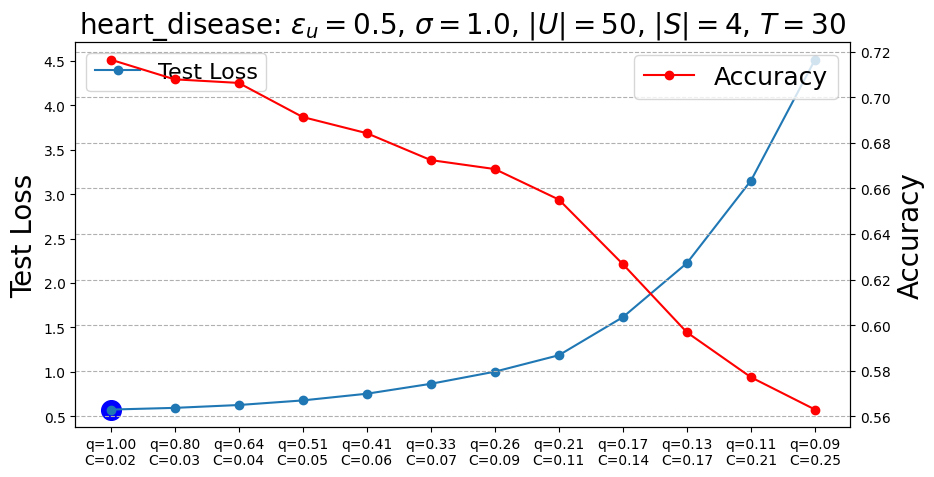

Max Metric: 0.7165354330708661 at {0.5: 0}
{0.5: 0} 0.5754557847976685
static_optimization_14477d9a45397c3b08e71ecb3d03625c.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-100.png


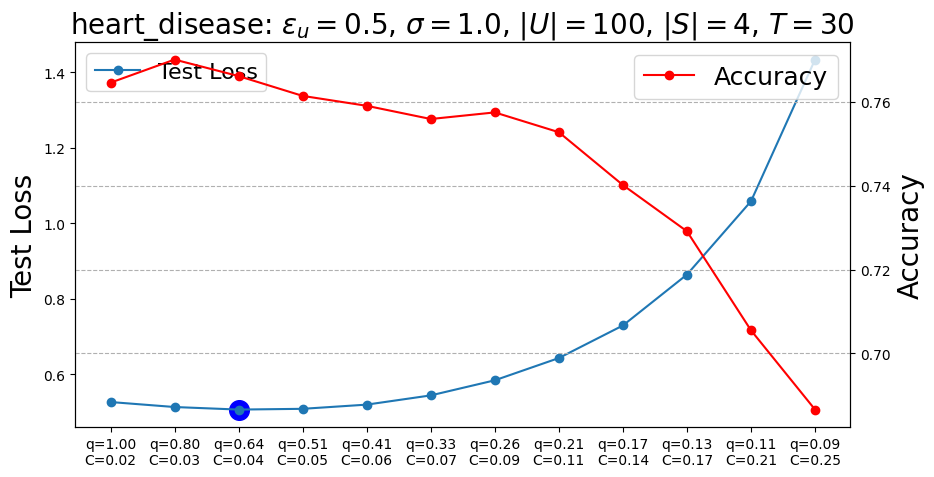

Max Metric: 0.7700787401574802 at {0.5: 1}
{0.5: 2} 0.5067352712154388
static_optimization_a46309365ea1e7cf84b2975d202627e1.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-200.png


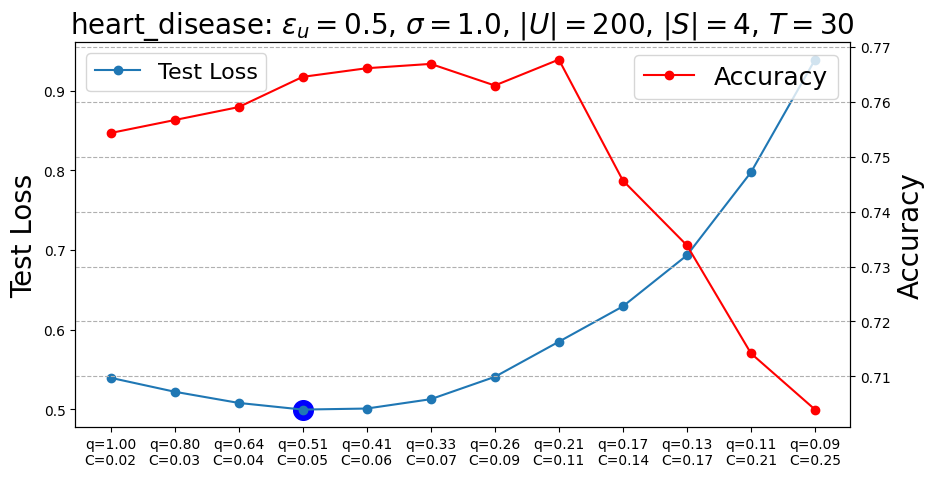

Max Metric: 0.7677165354330708 at {0.5: 7}
{0.5: 3} 0.49974275231361387
static_optimization_bde3ba968951a02ae63614064cf75982.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-400.png


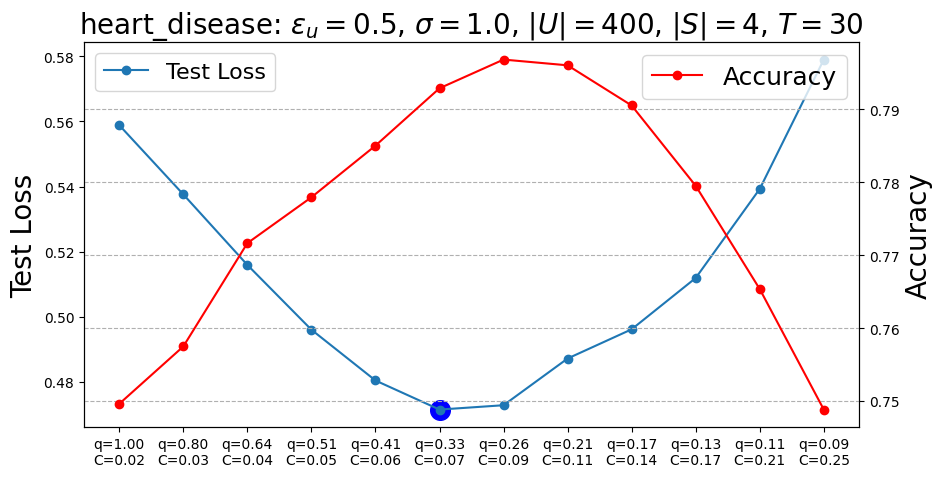

Max Metric: 0.7968503937007874 at {0.5: 6}
{0.5: 5} 0.4715360403060913


In [5]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(eps_u=0.5, parallelized=True)

for n_users in [50, 100, 200, 400]:
    fed_sim_params.n_users = n_users
    idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=12)
    static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=None, force_update=False)
    min_idx, min_loss = show_static_optimization_result(
        fed_sim_params, idx_per_group_list, 
        img_name=f"heart_disease-users-{n_users}"
    )
    print(min_idx, min_loss)

static_optimization_71c841d2203378db478b30ba21f668a2.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-50-dynamic_global_learning_rate.png


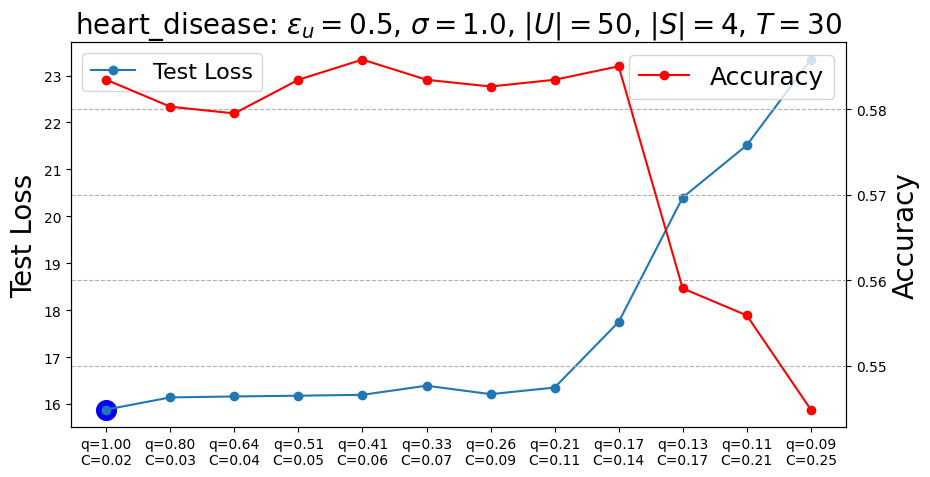

Max Metric: 0.5858267716535434 at {0.5: 4}
{0.5: 0} 15.881447410583496
static_optimization_d92b4c632bd8304fc3171cc6ef8887a6.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-100-dynamic_global_learning_rate.png


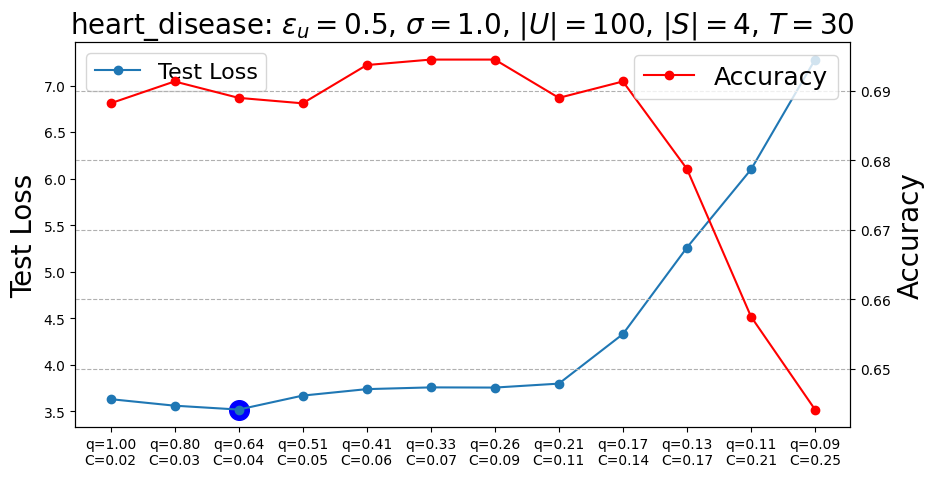

Max Metric: 0.6944881889763781 at {0.5: 5}
{0.5: 2} 3.51794490814209
static_optimization_def8410cacb7e717fa0d17f524edd144.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-200-dynamic_global_learning_rate.png


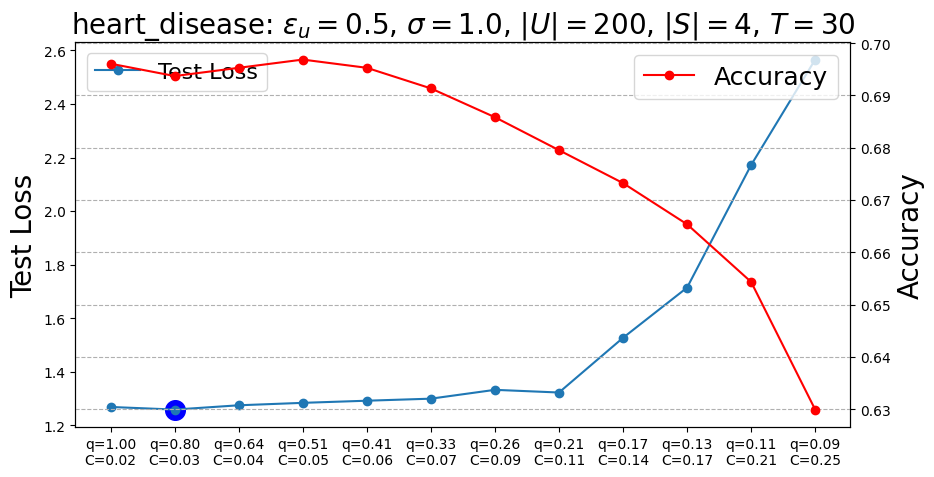

Max Metric: 0.6968503937007874 at {0.5: 3}
{0.5: 1} 1.2581852793693542
static_optimization_8783992f5cd5ce8432d23f8ca5f31ae2.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-400-dynamic_global_learning_rate.png


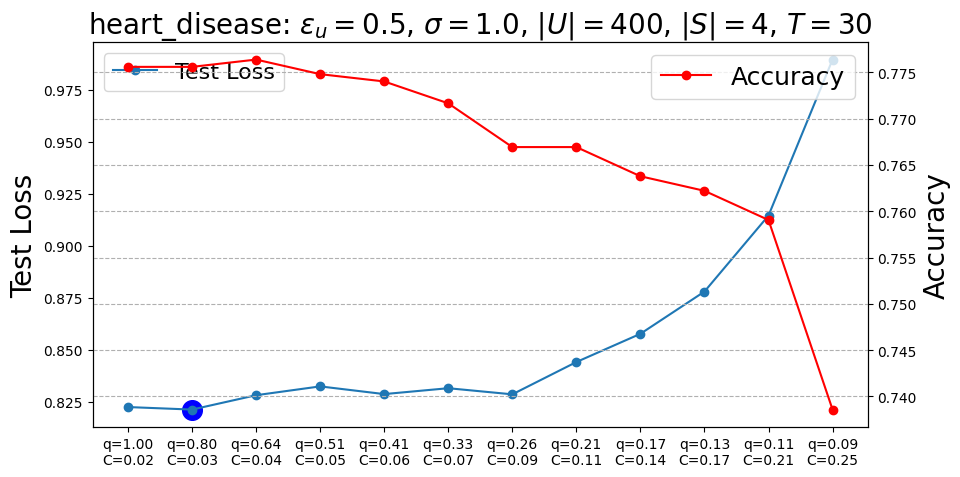

Max Metric: 0.7763779527559055 at {0.5: 2}
{0.5: 1} 0.8212176322937011


In [6]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(
    eps_u=0.5, parallelized=True, dynamic_global_learning_rate=True,
)

for n_users in [50, 100, 200, 400]:
    fed_sim_params.n_users = n_users
    idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=12)
    static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=None, force_update=False)
    min_idx, min_loss = show_static_optimization_result(
        fed_sim_params, idx_per_group_list, 
        img_name=f"heart_disease-users-{n_users}-dynamic_global_learning_rate"
    )
    print(min_idx, min_loss)

#### Various eps_u with a single eps group (Fig in Sec4)

static_optimization_b029f4bf62e77a7c7c5e3c6b0e32dcc4.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-0.15.png


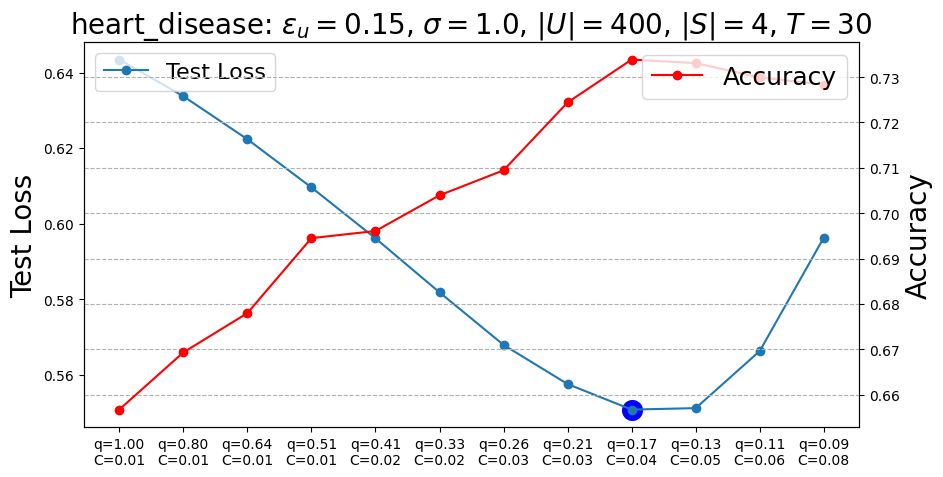

Max Metric: 0.7338582677165355 at {0.15: 8}
{0.15: 8} 0.5507778882980346
static_optimization_bde3ba968951a02ae63614064cf75982.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-0.5.png


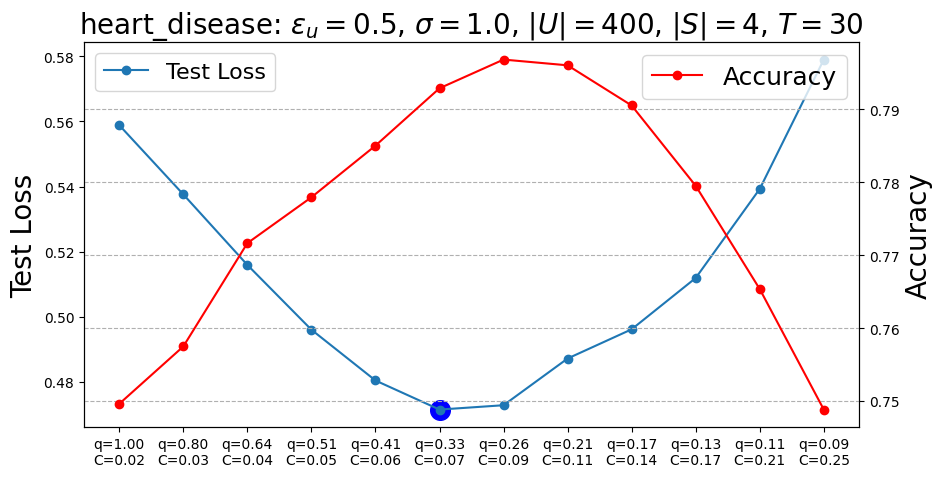

Max Metric: 0.7968503937007874 at {0.5: 6}
{0.5: 5} 0.4715360403060913
static_optimization_29d463ef4f8a6ae989a6c6917f239da8.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-1.0.png


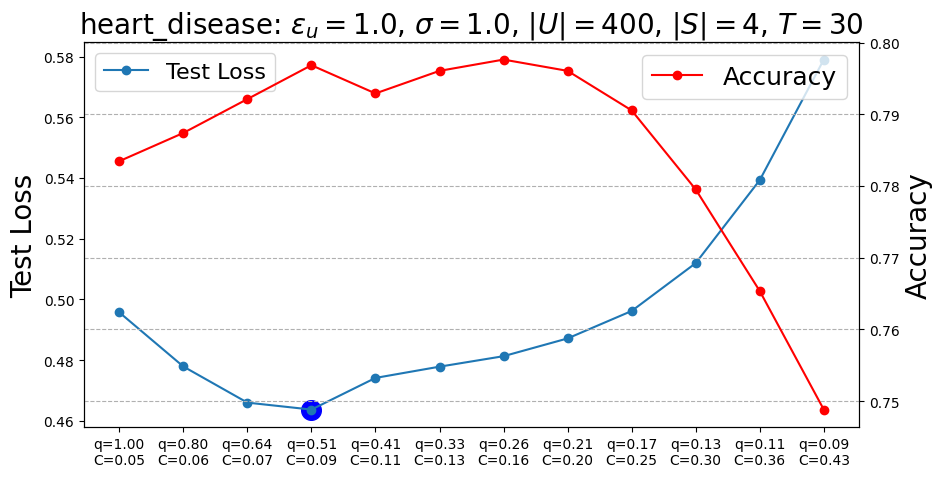

Max Metric: 0.7976377952755904 at {1.0: 6}
{1.0: 3} 0.46369879245758056
static_optimization_597b4688d14518f11bcadab088eb6edf.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-5.0.png


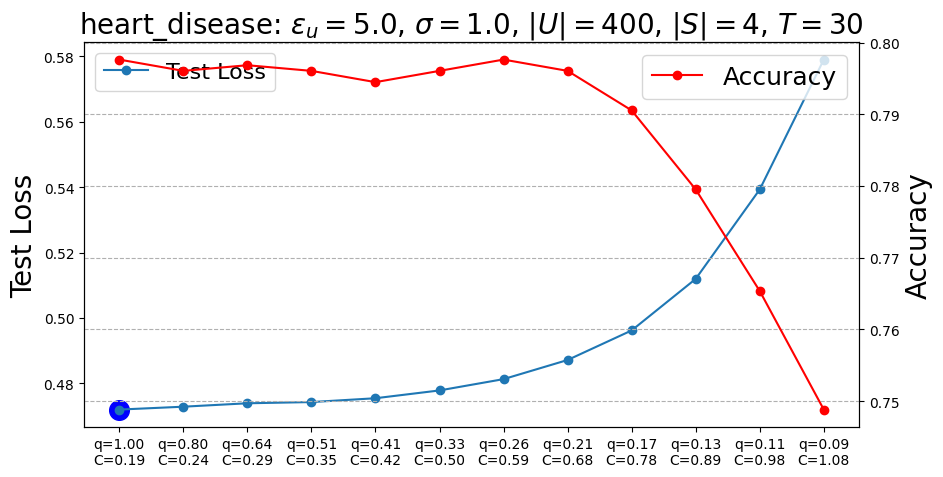

Max Metric: 0.7976377952755905 at {5.0: 0}
{5.0: 0} 0.4719789981842041


In [7]:
for eps_u in [0.15, 0.5, 1.0, 5.0]:
    fed_sim_params = init_heart_disease_param(eps_u=eps_u, parallelized=True)
    idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=12)
    static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=None, force_update=False)
    min_idx, min_loss = show_static_optimization_result(
        fed_sim_params, idx_per_group_list, 
        img_name=f"heart_disease-uniform-eps-{eps_u}"
    )
    print(min_idx, min_loss)

#### for ULDP-AVG

static_optimization_0ef2f435b49ae1a3b9211a5155506065.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uldpavg.png


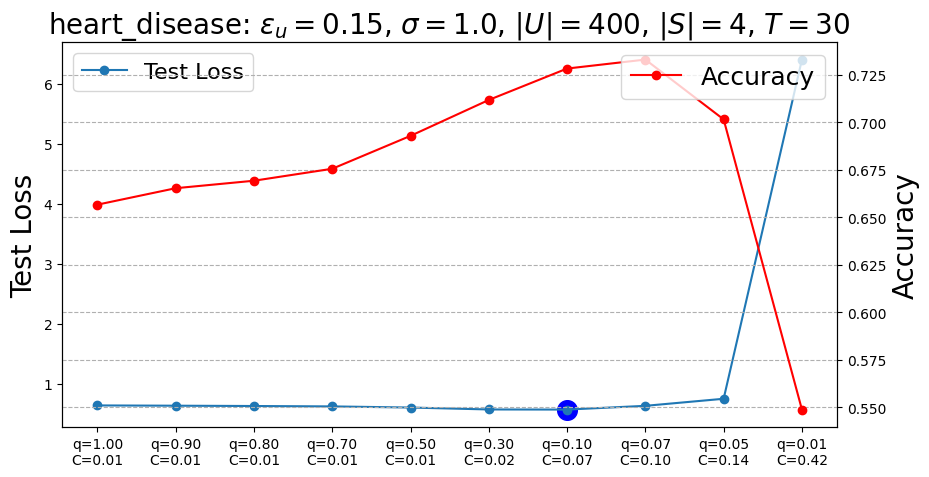

Max Metric: 0.7330708661417323 at {0.15: 7}
min_idx = {0.15: 6}, min_loss = 0.5743536829948426


In [8]:
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1, 0.07, 0.05, 0.01]
fed_sim_params = init_heart_disease_param(eps_u=0.15, parallelized=True)
idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=10)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, 
    static_q_u_list=static_q_u_list,
    img_name=f"{fed_sim_params.dataset_name}-uldpavg",
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

### MNIST

#### QCGridSearch (Test with all of HPs for showing group-independency, Figure in Appendix)

In [ ]:
# logger_set_info()
# fed_sim_params = init_mnist_param(
#     gpu_id=0, parallelized=True, n_users=2000, times=2)
# fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
# fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
# fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
# static_q_u_list = [1.0, 0.5, 0.25, 0.1, 0.05]

# idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=5)
# static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
# min_idx, min_loss = show_static_optimization_result(
#     fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
#     img_name=f"mnist-PULDPAVG", is_3d=True
# )
# print(f"min_idx = {min_idx}, min_loss = {min_loss}")

#### n_users = 100, 500, 2000, 10000

static_optimization_f592fe592200890572b1ee465a0acc74.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-users-100.png


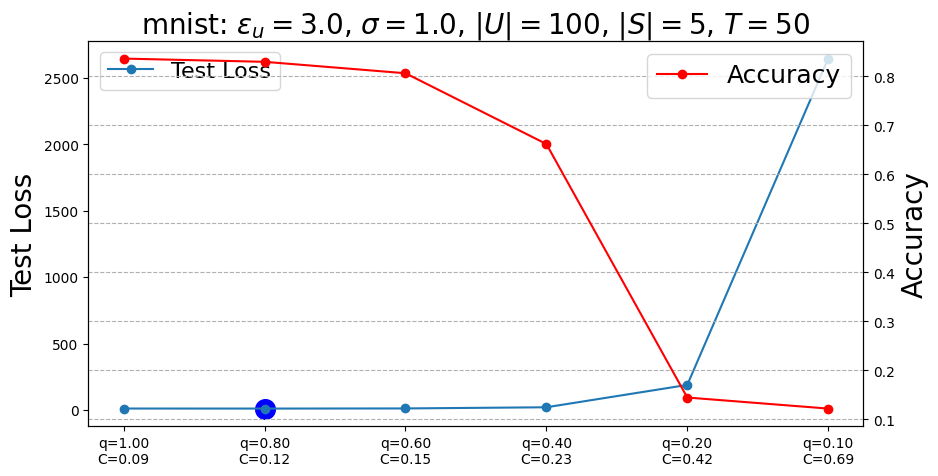

Max Metric: 0.8357 at {3.0: 0}
min_idx = {3.0: 1}, min_loss = 10.75863991677761
static_optimization_1c457b434e709a1dd202f17909ec772e.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-users-500.png


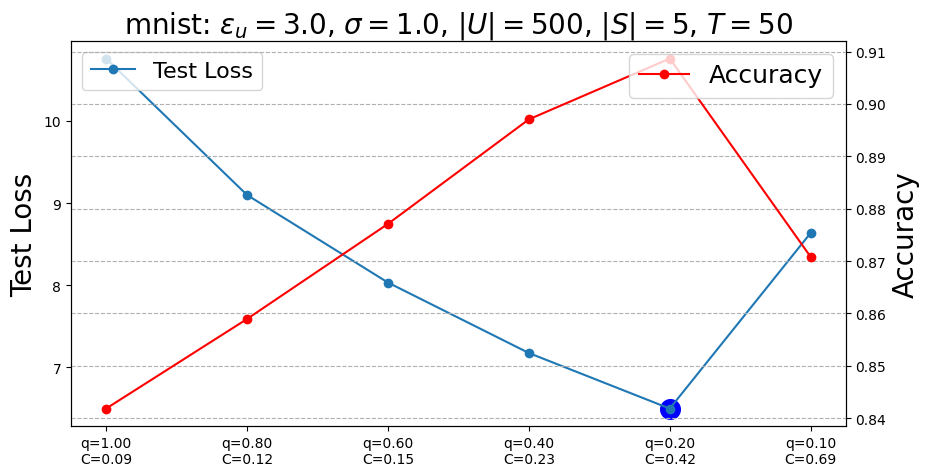

Max Metric: 0.90865 at {3.0: 4}
min_idx = {3.0: 4}, min_loss = 6.498760849237442
static_optimization_5fdb7d5956c8b1613e5b016ba1e4a2d5.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-users-2000.png


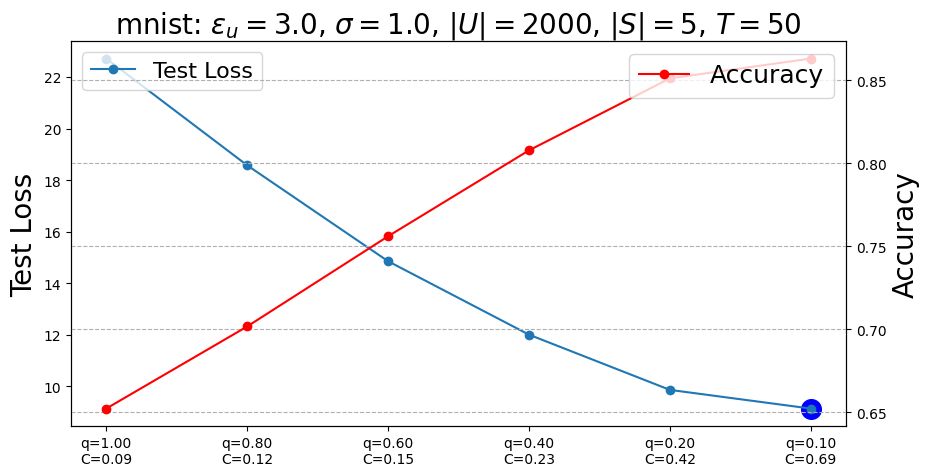

Max Metric: 0.8632 at {3.0: 5}
min_idx = {3.0: 5}, min_loss = 9.134333297610283


In [5]:
logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
fed_sim_params = init_mnist_param(
    n_users=100, eps_u=3.0, times=2,
    gpu_id=0, parallelized=True)
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-users-{100}", outlier=-1,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=3.0, times=2,
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-users-{500}", outlier=-1,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")


logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01]
n_users = 2000
fed_sim_params = init_mnist_param(
    n_users=n_users, eps_u=3.0, times=2)
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=8
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-users-{n_users}", outlier=-2,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")


# logger_set_info()
# static_q_u_list = [0.4, 0.2, 0.1, 0.05, 0.01, 0.005]
# n_users = 10000
# fed_sim_params = init_mnist_param(
#     n_users=n_users, eps_u=3.0, times=2, parallelized=True, gpu_id=0)
# idx_per_group_list = prepare_grid_search(
#     fed_sim_params.get_group_eps_set(), 
#     start_idx=0, end_idx=5
# )
# static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
# min_idx, min_loss = show_static_optimization_result(
#     fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
#     img_name=f"mnist-all-users-{n_users}",
# )
# print(f"min_idx = {min_idx}, min_loss = {min_loss}")

#### eps = 0.15, 1.0, 3.0, 5.0, 10.0

static_optimization_4450173436cc29e08670716f11af7657.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-ULDPAVG-users-500-eps-0.15.png


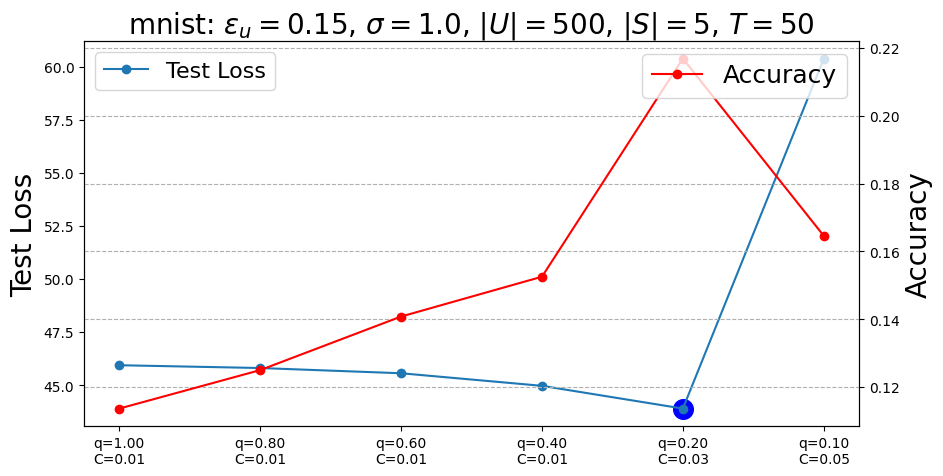

Max Metric: 0.2169 at {0.15: 4}
min_idx = {0.15: 4}, min_loss = 43.892359256744385
static_optimization_2e03b730948df6e028d09ba01fcf37cf.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-users-500-eps-1.0.png


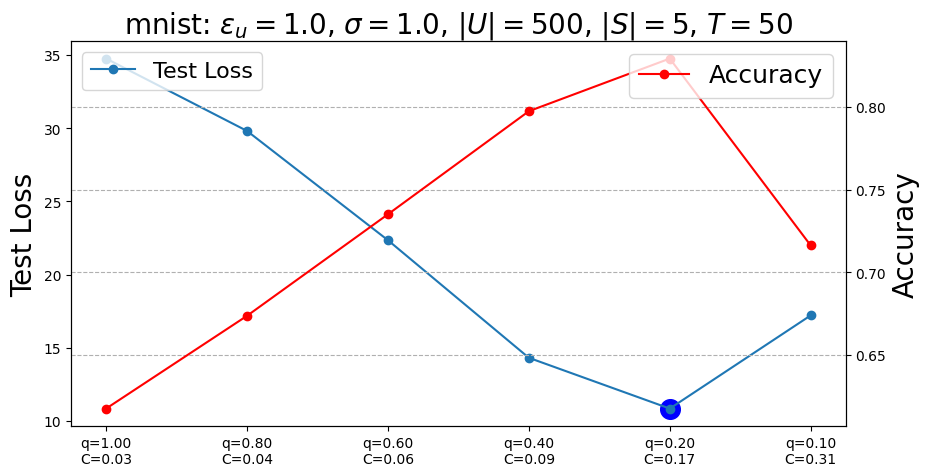

Max Metric: 0.82935 at {1.0: 4}
min_idx = {1.0: 4}, min_loss = 10.838528484106064
static_optimization_1c457b434e709a1dd202f17909ec772e.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-users-500-eps-3.0.png


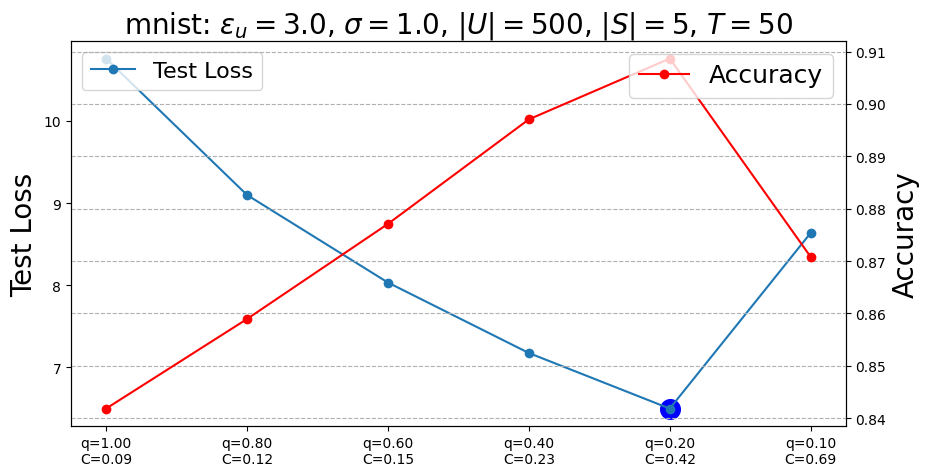

Max Metric: 0.90865 at {3.0: 4}
min_idx = {3.0: 4}, min_loss = 6.498760849237442
static_optimization_30ca57209bcf88dbcbf5ed8bddc4e87b.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-users-500-eps-5.0.png


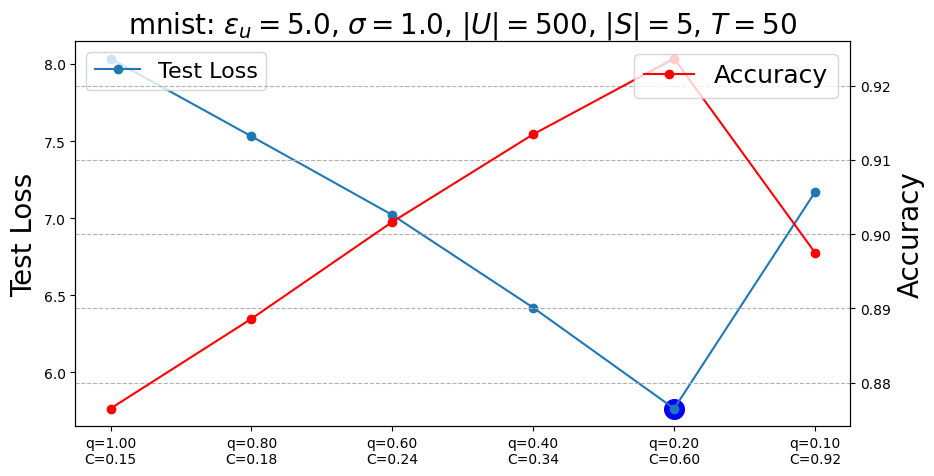

Max Metric: 0.9236500000000001 at {5.0: 4}
min_idx = {5.0: 4}, min_loss = 5.765177451074123
static_optimization_8b6e58ad04c66d9cf3b545dc343432c1.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-users-500-eps-10.0.png


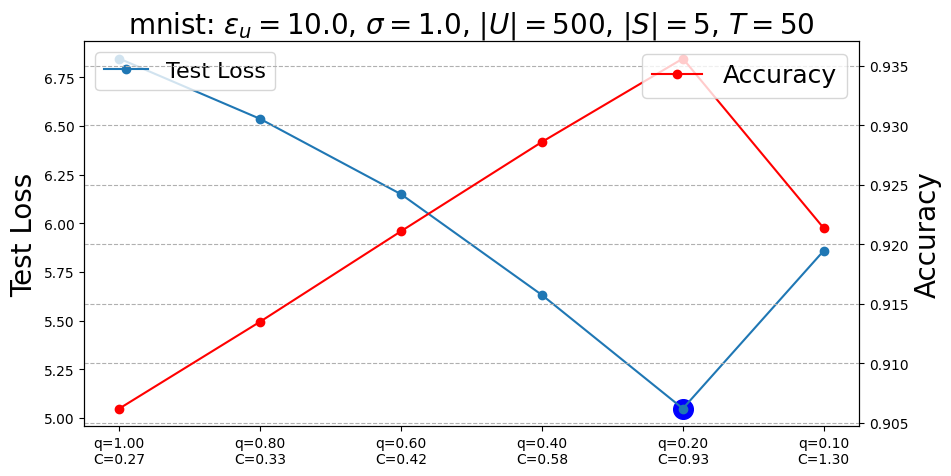

Max Metric: 0.9356 at {10.0: 4}
min_idx = {10.0: 4}, min_loss = 5.048707462847233


In [7]:
logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=0.15, times=2, parallelized=False)
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(),
    start_idx=0, end_idx=8
)
static_optimization(fed_sim_params, idx_per_group_list, 
                    static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-ULDPAVG-users-{500}-eps-{0.15}", outlier=-2,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=1.0, times=2,
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-users-{500}-eps-{1.0}", outlier=-1,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=3.0, times=2,
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-users-{500}-eps-{3.0}", outlier=-1,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=5.0, times=2,
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-users-{500}-eps-{5.0}", outlier=-1,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")


logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=10.0, times=2,
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-users-{500}-eps-{10.0}", outlier=-1,
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

#### dynamic_global_learning_rate

static_optimization_55284db9e1718b7e173863f1162c9911.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-dynamic_global_learning_rate-0.5_n_users500.png


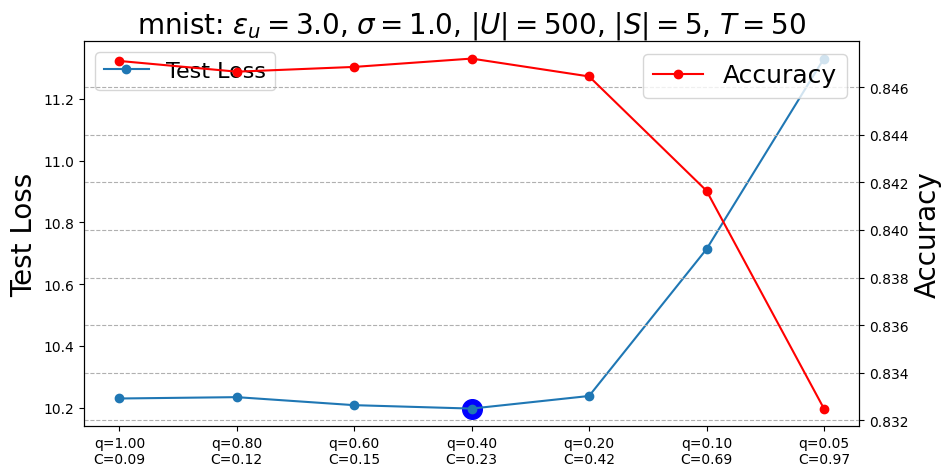

Max Metric: 0.8472 at {3.0: 3}
min_idx = {3.0: 3}, min_loss = 10.196974873542786
static_optimization_80062eb931e85233ee18cbe3a25266d6.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-dynamic_global_learning_rate-1.0_n_users500.png


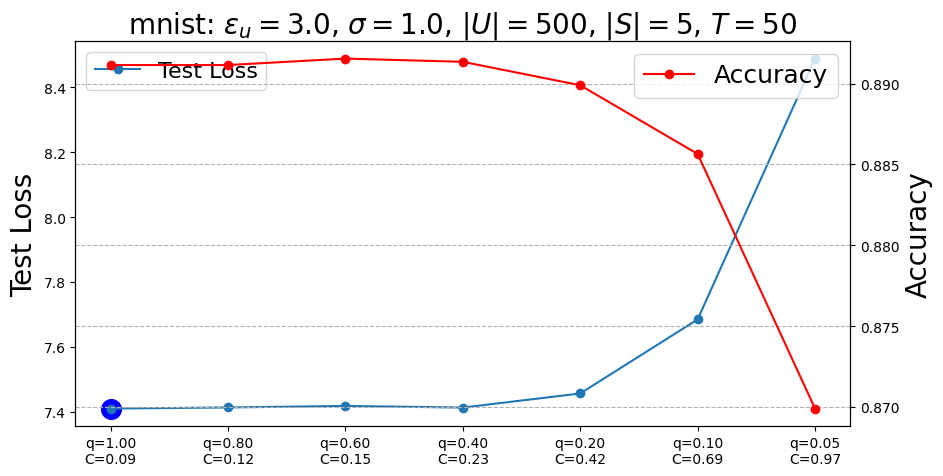

Max Metric: 0.8915500000000001 at {3.0: 2}
min_idx = {3.0: 0}, min_loss = 7.409576117992401
static_optimization_95f295184848464e5cae42f3986ea5fe.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all-dynamic_global_learning_rate-n_users2000.png


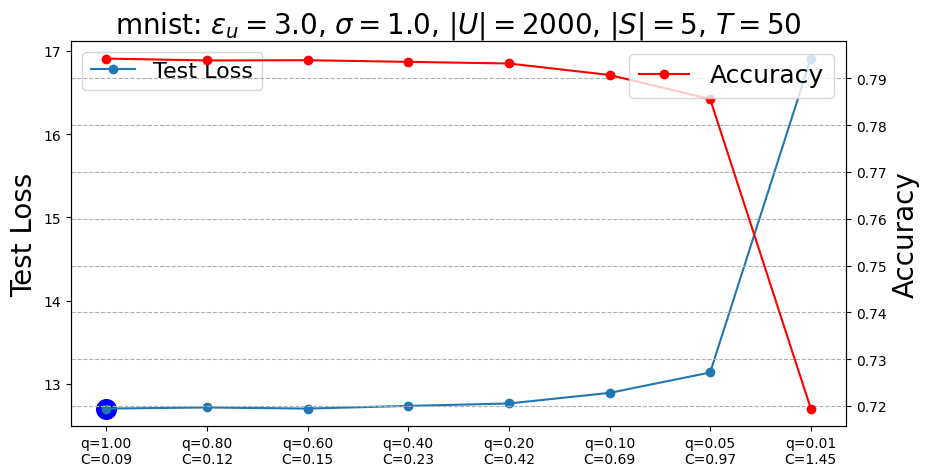

Max Metric: 0.79425 at {3.0: 0}
min_idx = {3.0: 0}, min_loss = 12.700615525245667


In [11]:
logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
n_users = 500
fed_sim_params = init_mnist_param(
    global_learning_rate=0.5, dynamic_global_learning_rate=True,
    n_users=n_users, eps_u=3.0, times=2, 
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-dynamic_global_learning_rate-{0.5}_n_users{n_users}"
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")


logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
n_users = 500
fed_sim_params = init_mnist_param(
    global_learning_rate=1.0, dynamic_global_learning_rate=True,
    n_users=n_users, eps_u=3.0, times=2, 
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-dynamic_global_learning_rate-{1.0}_n_users{n_users}"
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")


logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01]
n_users = 2000
fed_sim_params = init_mnist_param(
    global_learning_rate=1.0, dynamic_global_learning_rate=True,
    n_users=n_users, eps_u=3.0, times=2,
    gpu_id=3, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=8
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all-dynamic_global_learning_rate-n_users{n_users}"
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

#### ULDP-AVG (n=500 and 2000)

static_optimization_4450173436cc29e08670716f11af7657.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-ULDPAVG-users-500.png


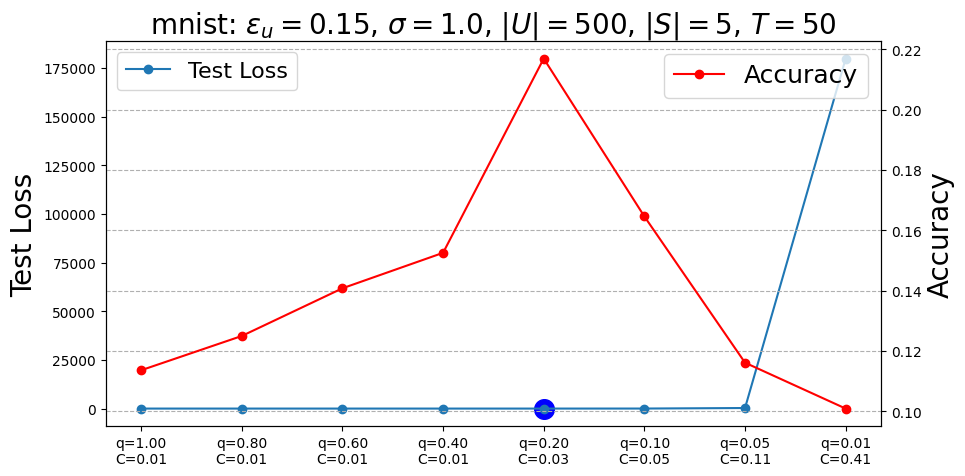

Max Metric: 0.2169 at {0.15: 4}
min_idx = {0.15: 4}, min_loss = 43.892359256744385
static_optimization_bc8dc2546e48e70f50fd813c70d82dba.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-ULDPAVG-users-2000.png


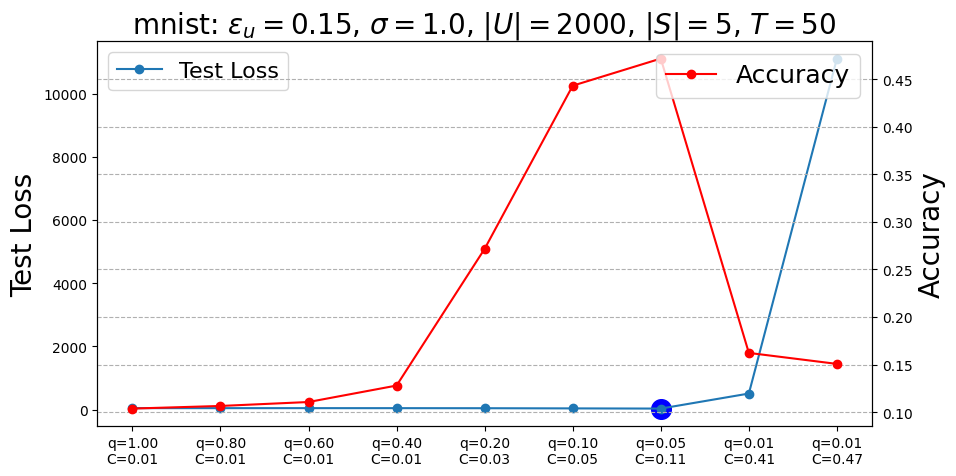

Max Metric: 0.4716 at {0.15: 6}
min_idx = {0.15: 6}, min_loss = 32.23375713825226


In [12]:
logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=0.15, times=2, parallelized=False)
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(),
    start_idx=0, end_idx=8
)
static_optimization(fed_sim_params, idx_per_group_list, 
                    static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-ULDPAVG-users-{500}"
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")


logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01, 0.005]
fed_sim_params = init_mnist_param(
    n_users=2000, eps_u=0.15, times=2, parallelized=False)
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(),
    start_idx=0, end_idx=9
)
static_optimization(fed_sim_params, idx_per_group_list, 
                    static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-ULDPAVG-users-{2000}"
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

## Online HPO

### HeartDisease

#### QCTest

##### different initial q_u

online_optimization_24dfa0842c82f7a4d899094ba71c4e48.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1.png


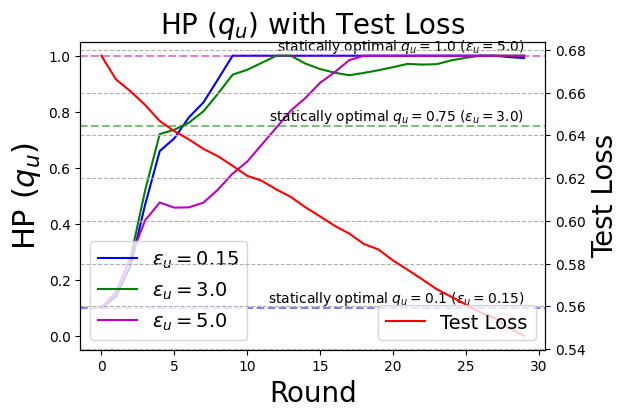

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1.png


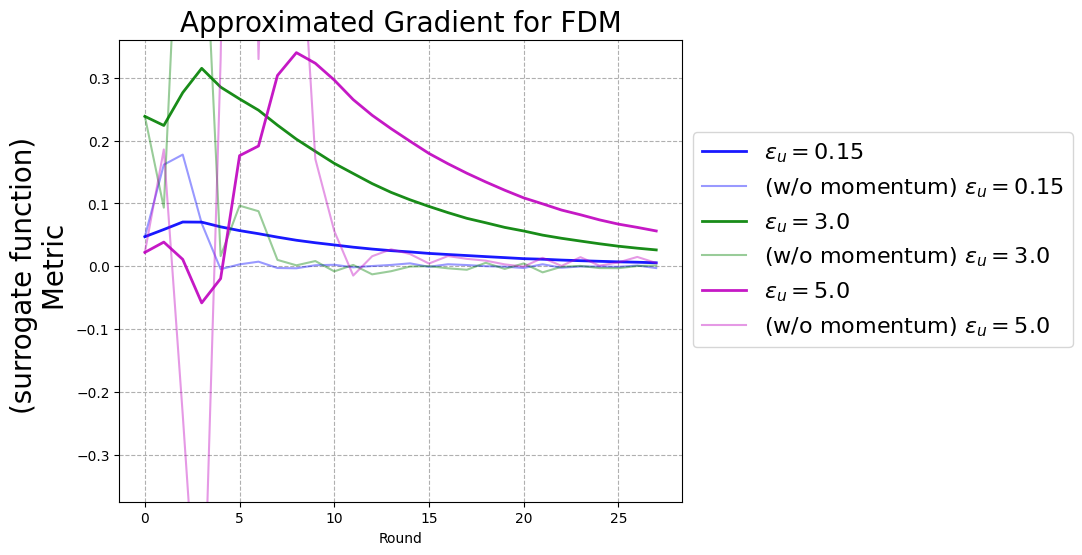

online_optimization_454d88b03559f53b1109fdb6d5c86350.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5.png


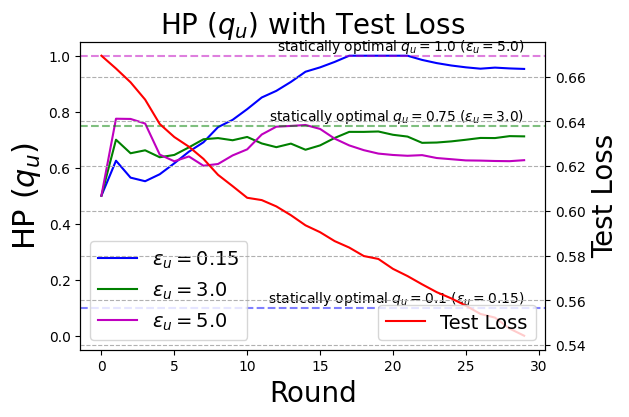

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5.png


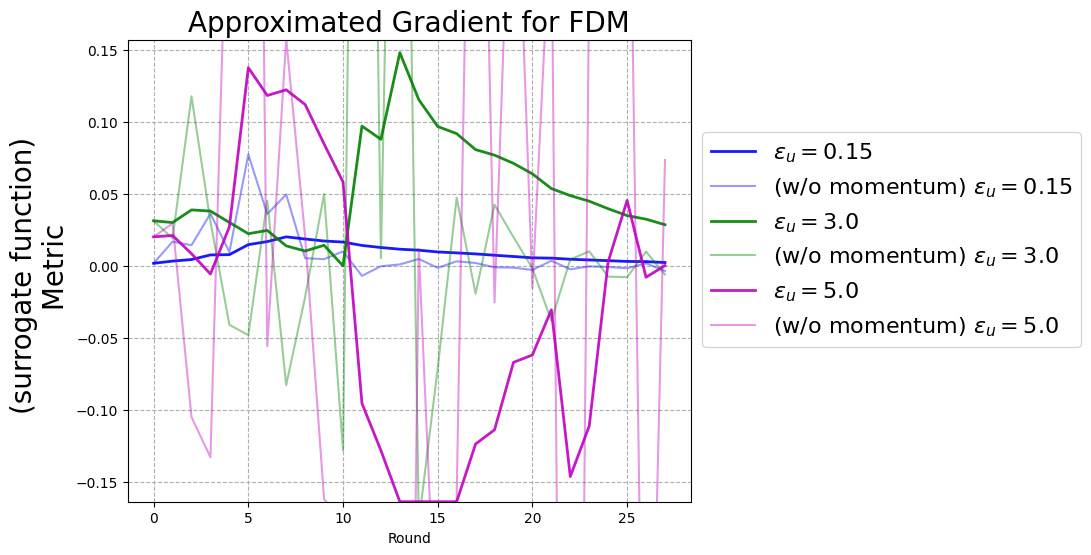

online_optimization_464799833a82227c3f30b5e4991ee99b.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-1.0.png


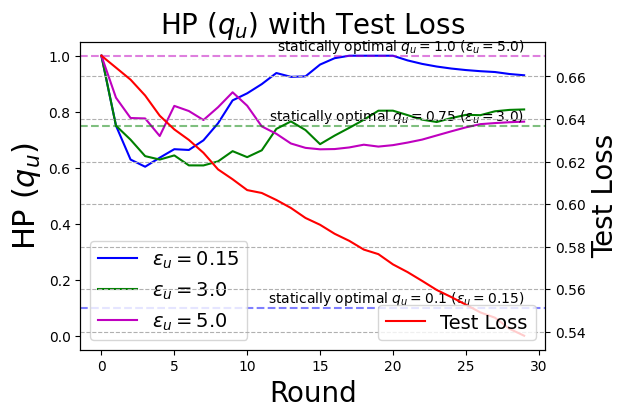

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-1.0.png


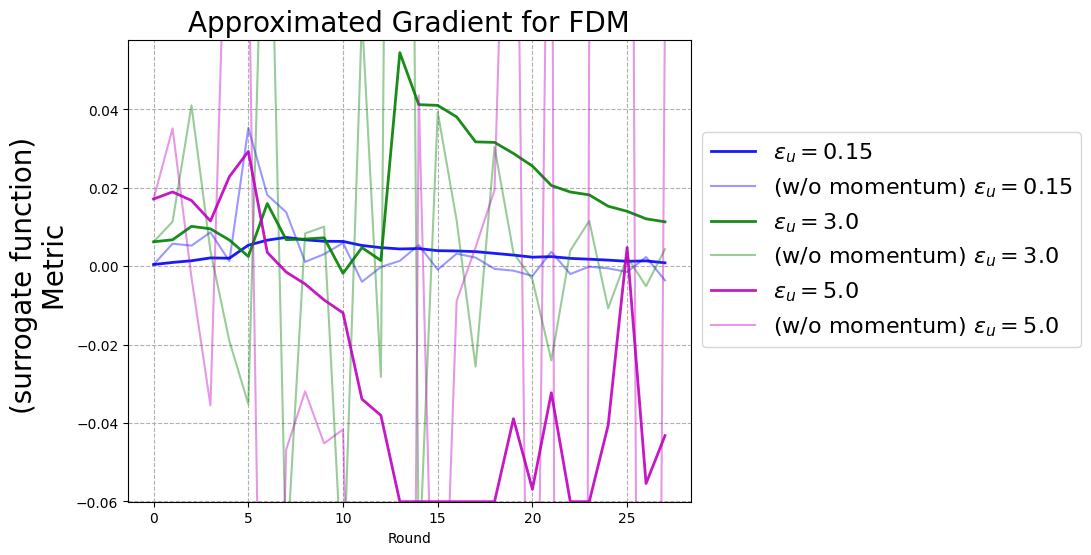

In [5]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 3
fed_sim_params.q_step_size = 0.5
fed_sim_params.momentum_weight = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTest"

initial_q_u_list = [0.1, 0.5, 1.0]
for q_step_size in [0.5, 0.7, 0.9]:
    for momentum_weight in [0.5, 0.7, 0.9]:
        fed_sim_params.q_step_size = q_step_size
        fed_sim_params.momentum_weight = momentum_weight
        for initial_q_u in initial_q_u_list:
            fed_sim_params.initial_q_u = initial_q_u
            run_online_optimization(fed_sim_params, force_update=False)
            x, acc_means, acc_stds = show_online_optimization_result(
                fed_sim_params, errorbar=False,
                img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}",
                statically_optimal_q_u_dct={0.15: 0.1, 3.0: 0.75, 5.0: 1.0},
            )

##### no noise

online_optimization_6c53f36d5d6710c7b3fa9f074acca0a9.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1-no-noise.png


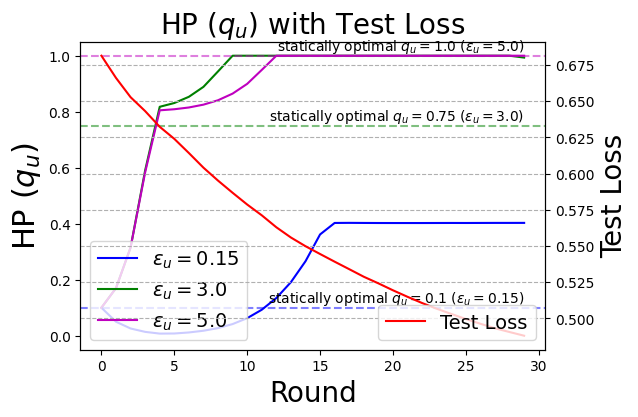

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1-no-noise.png


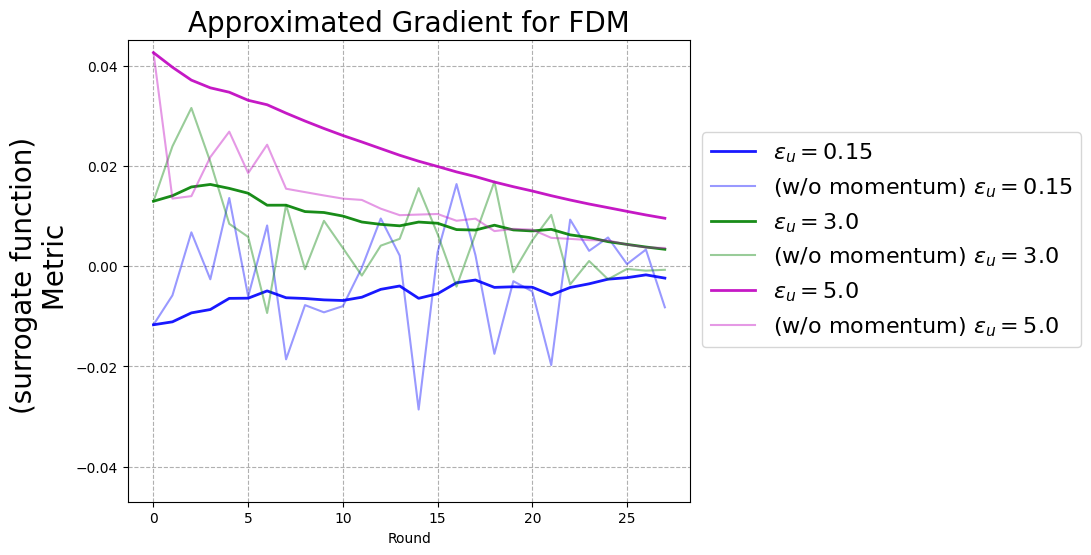

online_optimization_33d5910f364120c4f357a6f24f4463fc.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5-no-noise.png


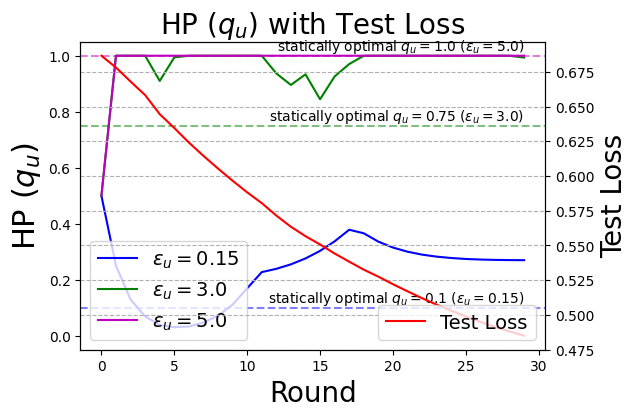

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5-no-noise.png


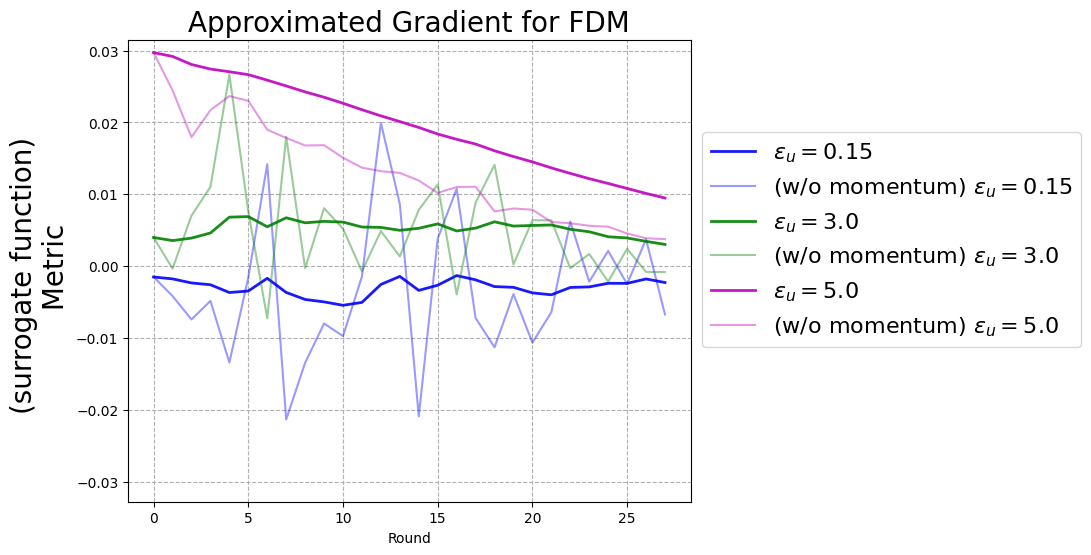

online_optimization_4d1fe9e85c23ed80caa6bc72845039a9.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-1.0-no-noise.png


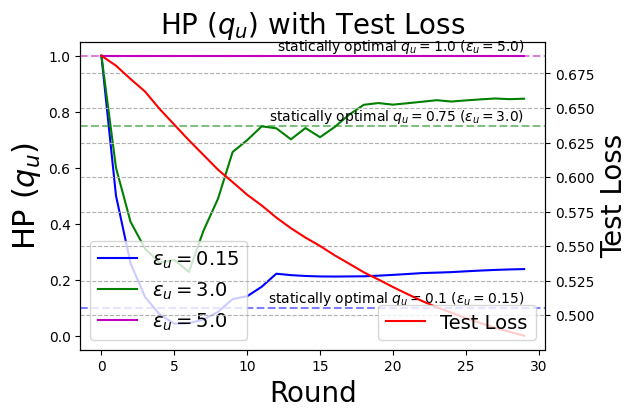

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-1.0-no-noise.png


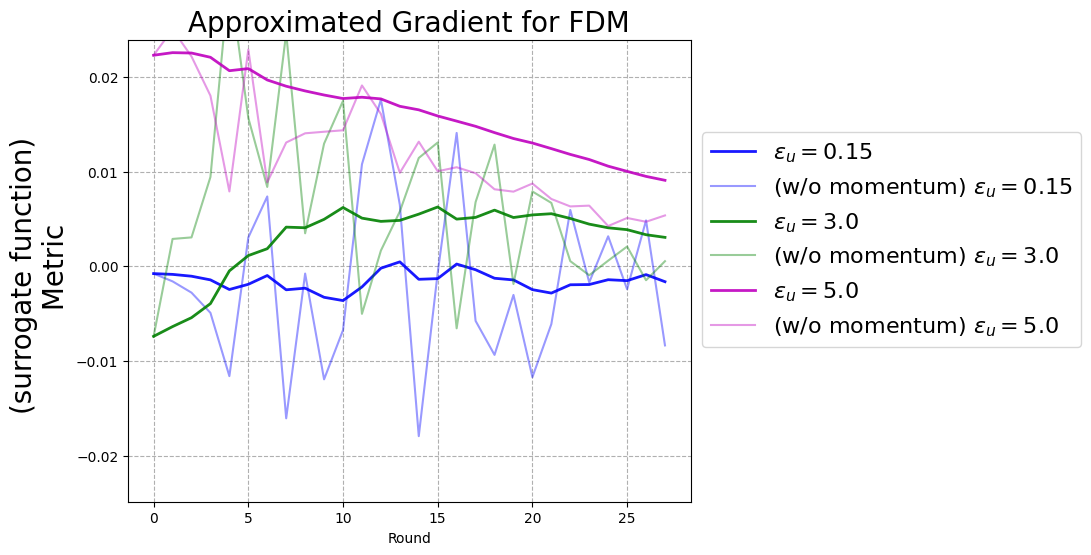

In [3]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.q_step_size = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTest"
fed_sim_params.off_train_loss_noise = True

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}-no-noise",
        statically_optimal_q_u_dct={0.15: 0.1, 3.0: 0.75, 5.0: 1.0},
    )
    hd_all_acc_results[("PULDP-AVG-QCTest (w/o noise)", initial_q_u)] = (x, acc_means, acc_stds)


#### QCTrain

##### different initial q_u

online_optimization_000111fa07ca387aa59bbb0599e000fa.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.1.png


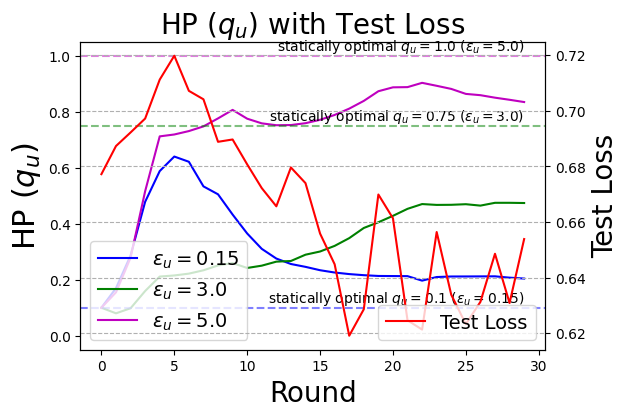

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.1.png


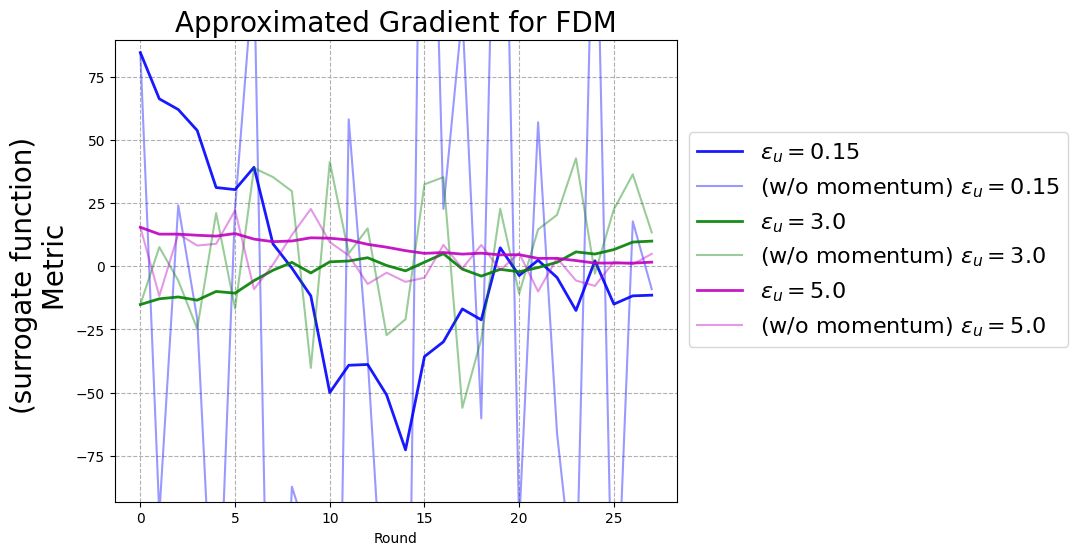

online_optimization_f5829a289bd6ddc04f6e5b77a5f76803.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.5.png


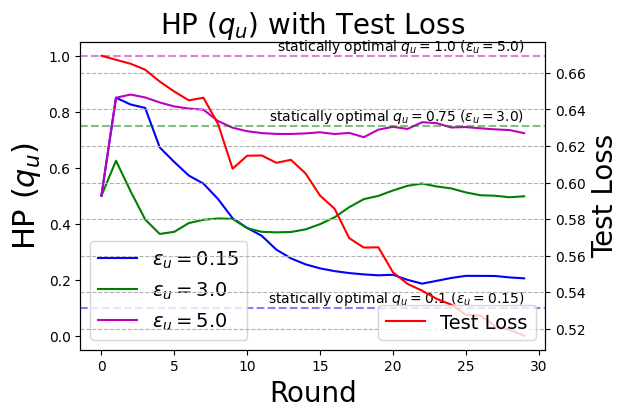

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.5.png


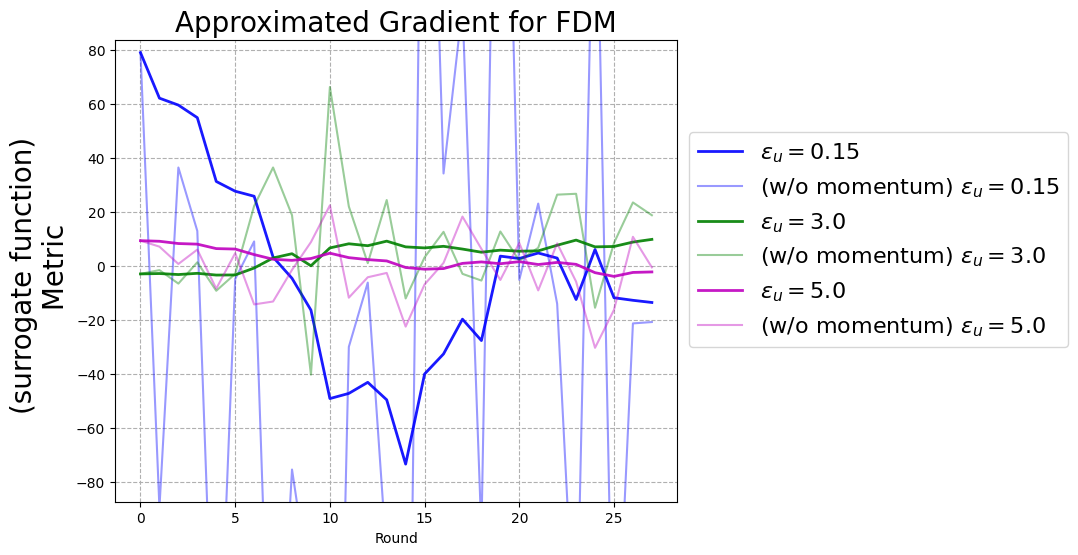

online_optimization_50eedc250d972770edce52fa29465422.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-1.0.png


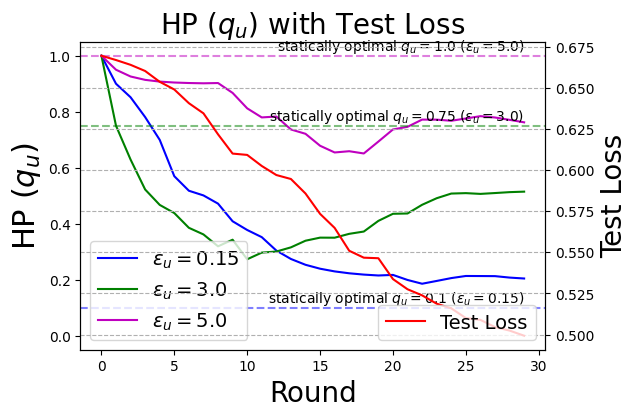

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-1.0.png


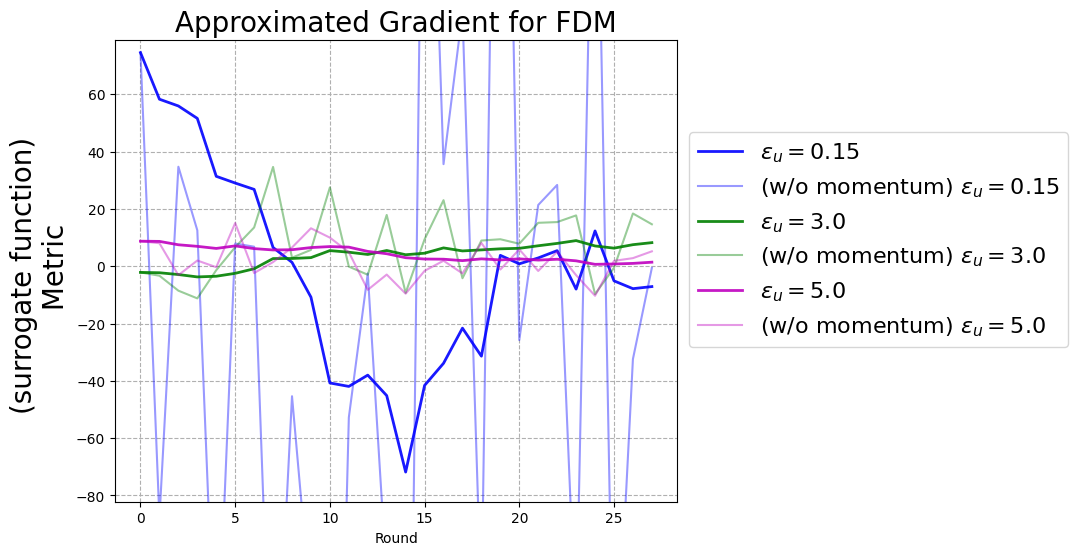

In [3]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.q_step_size = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}",
        statically_optimal_q_u_dct={0.15: 0.1, 3.0: 0.75, 5.0: 1.0},
    )
    hd_all_acc_results[(fed_sim_params.agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)

##### no noise

online_optimization_8df63a5ae728a258625b85632112c445.pkl
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start
======== TIME: 5 start
======== TIME: 6 start
======== TIME: 7 start
======== TIME: 8 start
======== TIME: 9 start
TEST ACC: 0.6992 ± 0.0992 , TEST LOSS: 0.9009 ± 0.9303
VALID ACC: 0.6764 ± 0.1179 , VALID LOSS: 0.9777 ± 1.1214
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.1-no-noise.png


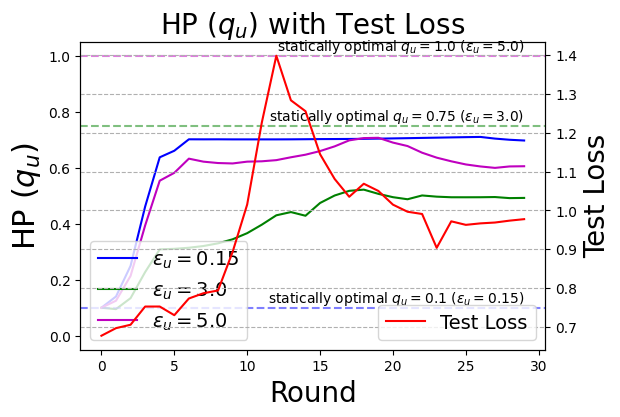

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.1-no-noise.png


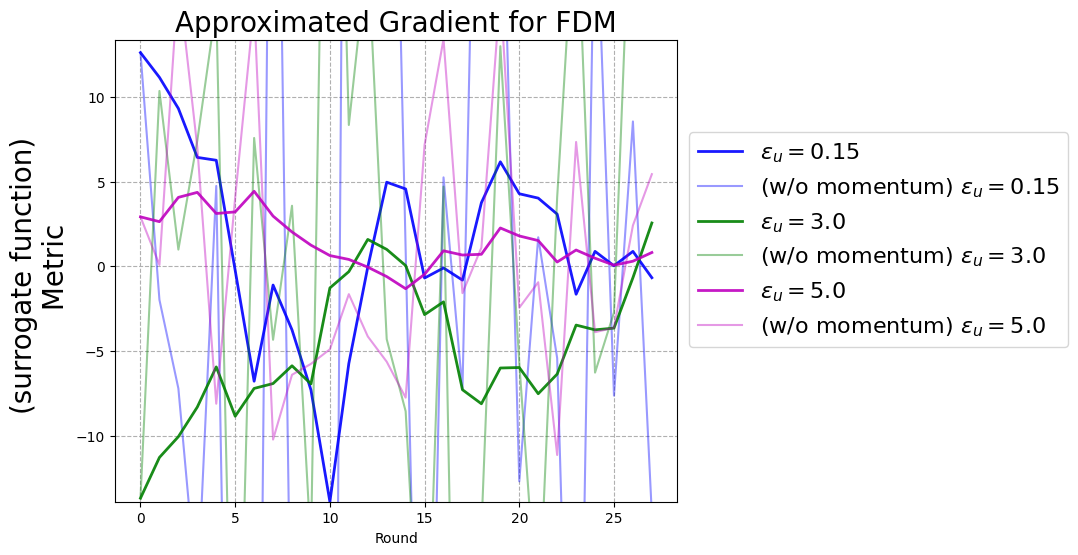

online_optimization_f169c67574500e010e101d5e4b06de5e.pkl
======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start
======== TIME: 3 start
======== TIME: 4 start


In [3]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.q_step_size = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.off_train_loss_noise = True

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=True)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}-no-noise",
        statically_optimal_q_u_dct={0.15: 0.1, 3.0: 0.75, 5.0: 1.0},
    )
    hd_all_acc_results[(fed_sim_params.agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)
    hd_all_acc_results[("PULDP-AVG-QCTrain (w/o noise)", initial_q_u)] = (x, acc_means, acc_stds)

#### Baselines

##### PULDP-AVG (Best HP by static optimization)

02/15/2024 12:25:04:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-heart_disease-PULDPAVG.png


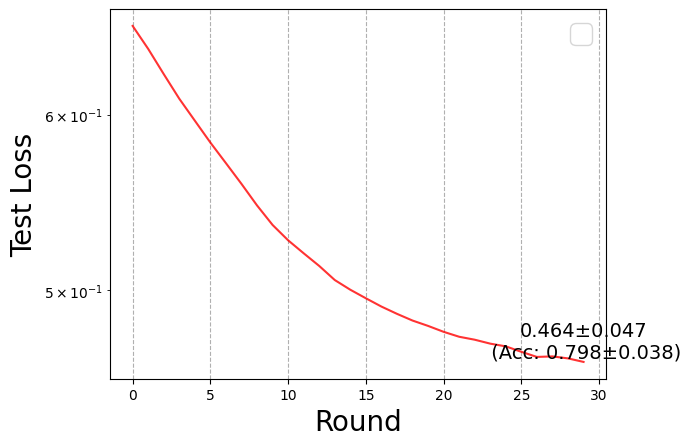

In [4]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=False)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.75, 0.5, 0.25, 0.12, 0.06, 0.03]
best_idx_per_group = {0.15: 4, 3.0: 1, 5.0: 0}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-PULDPAVG"
)
hd_all_acc_results[(fed_sim_params.agg_strategy, "PULDP-AVG (Offline HPO)")] = (x, acc_means, acc_stds)

##### random-updown

In [14]:
# if "hd_all_acc_results" not in locals():
#     hd_all_acc_results = {}

# logger_set_warning()
# fed_sim_params = init_heart_disease_param(parallelized=True)
# fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
# fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
# fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
# fed_sim_params.validation_ratio = 0.5
# fed_sim_params.times = 10
# fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
# fed_sim_params.hp_baseline = "random-updown"

# initial_q_u_list = [0.1, 0.5, 1.0]
# for initial_q_u in initial_q_u_list:
#     fed_sim_params.initial_q_u = initial_q_u
#     run_online_optimization(fed_sim_params, force_update=False)
#     x, acc_means, acc_stds = show_online_optimization_result(
#         fed_sim_params, errorbar=False,
#         img_name=f"{fed_sim_params.dataset_name}-{initial_q_u}-{fed_sim_params.hp_baseline}"
#     )
#     hd_all_acc_results[(fed_sim_params.hp_baseline, initial_q_u)] = (x, acc_means, acc_stds)

##### Random

online_optimization_c74bb473ce5cad06914e0472e44f112e.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-random.png


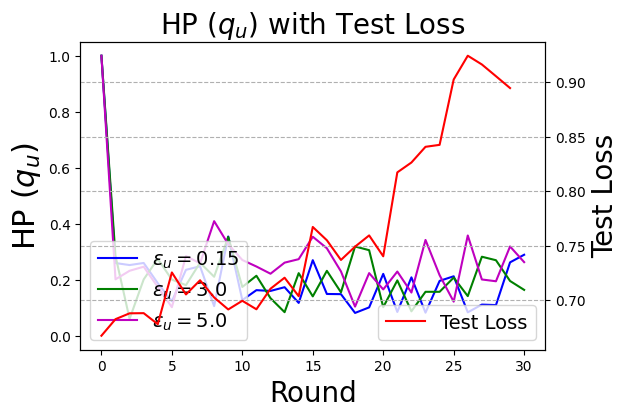

In [5]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.hp_baseline = "random"

run_online_optimization(fed_sim_params, force_update=False)
x, acc_means, acc_stds = show_online_optimization_result(
    fed_sim_params, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.hp_baseline}"
)
hd_all_acc_results[(fed_sim_params.hp_baseline, "Random")] = (x, acc_means, acc_stds)

##### Random-log

online_optimization_ecbd6c392570076da1fe276c0046fad3.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-random-log.png


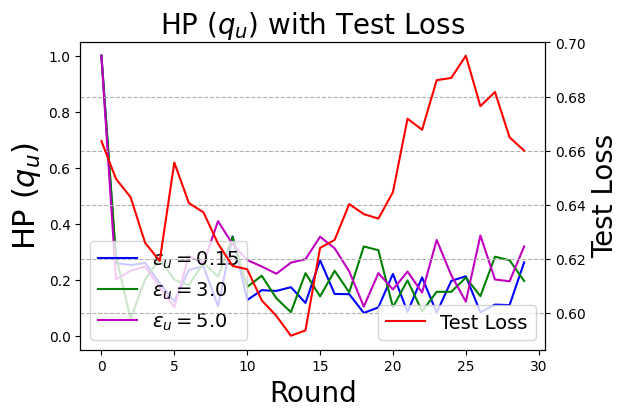

In [6]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.hp_baseline = "random-log"

run_online_optimization(fed_sim_params, force_update=False)
x, acc_means, acc_stds = show_online_optimization_result(
    fed_sim_params, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.hp_baseline}"
)
hd_all_acc_results[(fed_sim_params.hp_baseline, "Random-Log")] = (x, acc_means, acc_stds)

##### ULDP-AVG

02/15/2024 12:25:13:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-heart_disease-ULDPAVG.png


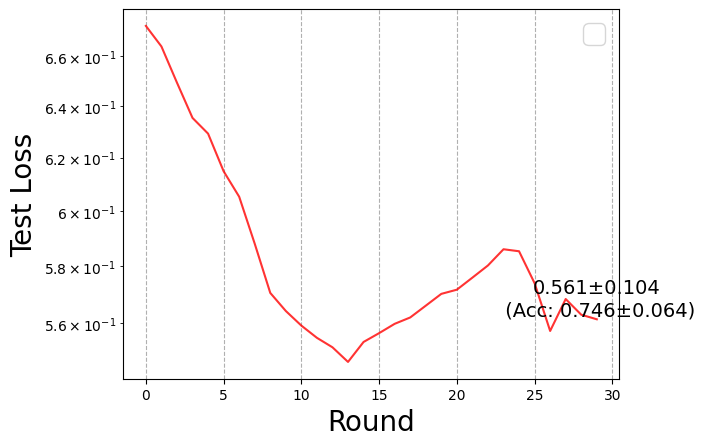

In [7]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15]
fed_sim_params.group_thresholds = [0.15]
fed_sim_params.ratio_list = [1.0]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1, 0.07, 0.05, 0.01]
best_idx_per_group = {0.15: 6}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-ULDPAVG"
)
hd_all_acc_results[(fed_sim_params.agg_strategy, "ULDP-AVG (Baseline)")] = (x, acc_means, acc_stds)

#### Compare all results

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/comparison-with-baselines-heart_disease.png


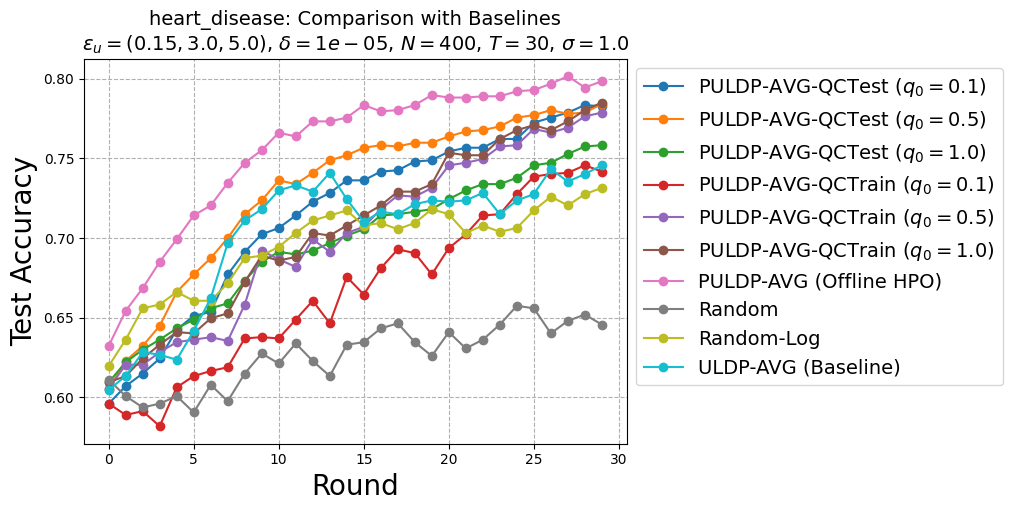

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/comparison-with-baselines-heart_disease-initial_q_u-0.5.png


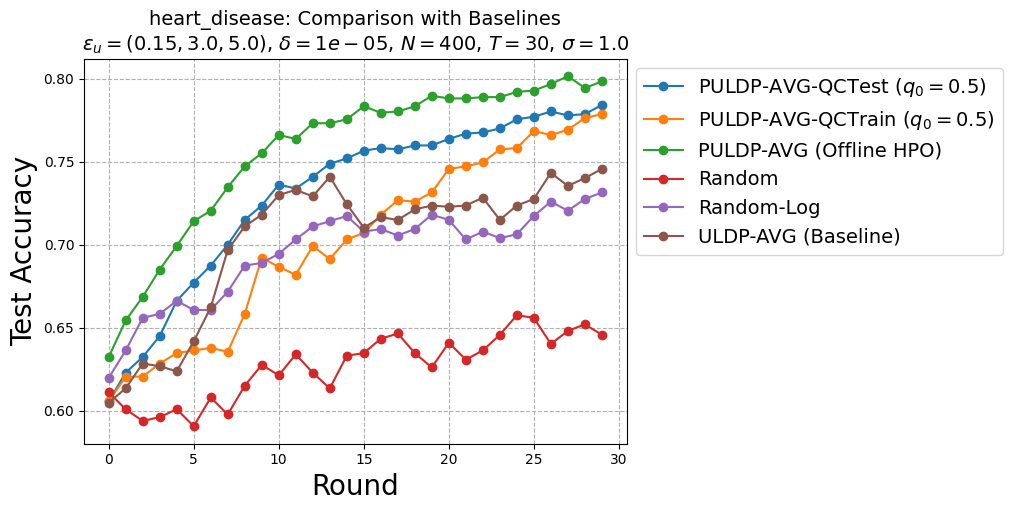

In [10]:
plot_acc_results(fed_sim_params, hd_all_acc_results, initial_q_u_list=[0.1, 0.5, 1.0], errorbar=False)
plot_acc_results(fed_sim_params, hd_all_acc_results, initial_q_u_list=[0.5], errorbar=False, img_name="-initial_q_u-0.5")

### MNIST n=500

#### PULDP-AVG

02/15/2024 12:11:32:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-mnist-PULDPAVG-users-500.png


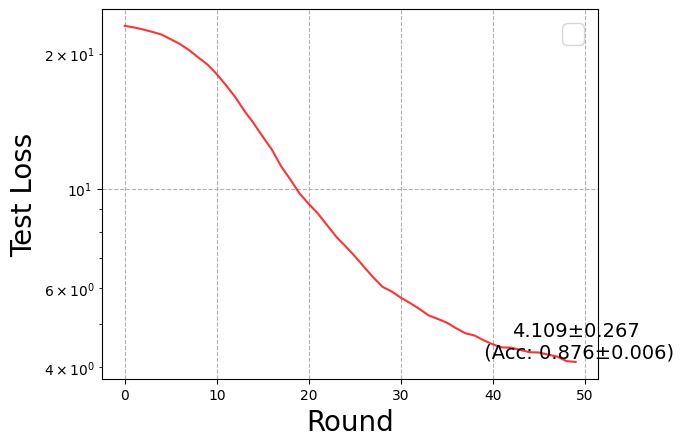

In [16]:
if "mnist_all_acc_results" not in locals():
    mnist_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_mnist_param(
    n_users=500, parallelized=False)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 5
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.5, 0.25, 0.1, 0.05]
best_idx_per_group = {0.15: 1, 3.0: 2, 5.0: 2}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-PULDPAVG-users-{500}"
)
mnist_all_acc_results[(fed_sim_params.agg_strategy, "PULDP-AVG (Offline HPO)")] = (x, acc_means, acc_stds)

#### ULDP-AVG

02/15/2024 12:11:36:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-mnist-ULDPAVG-users-500.png


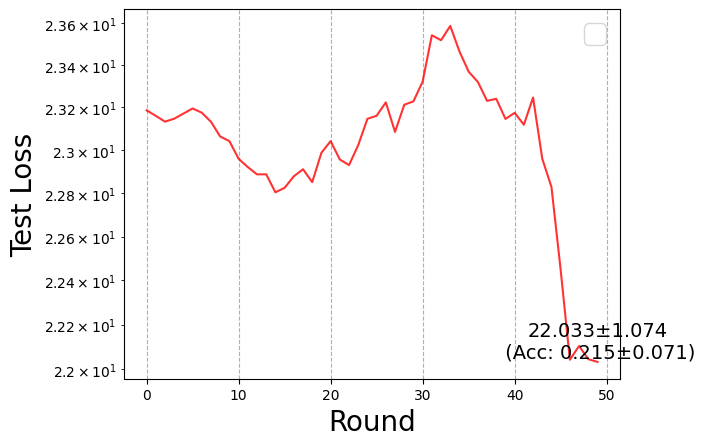

In [17]:
if "mnist_all_acc_results" not in locals():
    mnist_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=0.15, parallelized=False)
fed_sim_params.epsilon_list = [0.15]
fed_sim_params.group_thresholds = [0.15]
fed_sim_params.ratio_list = [1.0]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 5
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01]
best_idx_per_group = {0.15: 4}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-ULDPAVG-users-{500}"
)
mnist_all_acc_results[(fed_sim_params.agg_strategy, "ULDP-AVG (Baseline)")] = (x, acc_means, acc_stds)

#### random

online_optimization_a4f1e456db9c3b33732158f5f576030a.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-random.png


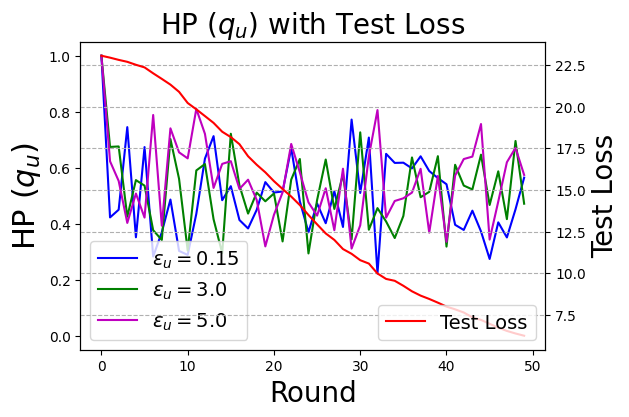

In [18]:
if "mnist_all_acc_results" not in locals():
    mnist_all_acc_results = {}

logger_set_info()
fed_sim_params = init_mnist_param(
    parallelized=False, n_users=500, times=5)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.hp_baseline = "random"

run_online_optimization(fed_sim_params, force_update=False)
x, acc_means, acc_stds = show_online_optimization_result(
    fed_sim_params, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.hp_baseline}"
)
mnist_all_acc_results[(fed_sim_params.hp_baseline, "Random")] = (x, acc_means, acc_stds)

#### random-log

online_optimization_7dc73877e65e7dd7814bfca709bf407e.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-random-log.png


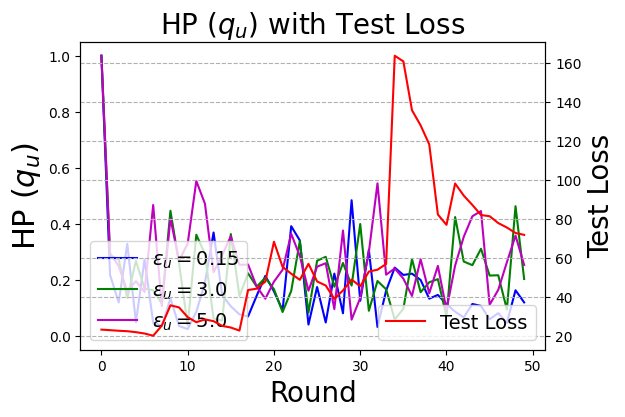

In [20]:
if "mnist_all_acc_results" not in locals():
    mnist_all_acc_results = {}
    
logger_set_info()
fed_sim_params = init_mnist_param(
    parallelized=False, n_users=500, times=5)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.hp_baseline = "random-log"

run_online_optimization(fed_sim_params, force_update=False)
x, acc_means, acc_stds = show_online_optimization_result(
    fed_sim_params, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.hp_baseline}"
)
mnist_all_acc_results[(fed_sim_params.hp_baseline, "Random-log")] = (x, acc_means, acc_stds)

#### random-updown

In [2]:
# if "mnist_all_acc_results" not in locals():
#     mnist_all_acc_results = {}
    
# logger_set_info()
# fed_sim_params = init_mnist_param(parallelized=False, n_users=500, times=5)
# fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
# fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
# fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
# fed_sim_params.validation_ratio = 0.5
# fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
# fed_sim_params.hp_baseline = "random-updown"

# initial_q_u_list = [0.1]
# for initial_q_u in initial_q_u_list:
#     fed_sim_params.initial_q_u = initial_q_u
#     run_online_optimization(fed_sim_params, force_update=False)
#     x, acc_means, acc_stds = show_online_optimization_result(
#         fed_sim_params,
#         errorbar=False,
#         img_name=f"{fed_sim_params.dataset_name}-{initial_q_u}-{fed_sim_params.hp_baseline}",
#     )
#     mnist_all_acc_results[(fed_sim_params.hp_baseline, initial_q_u)] = (x, acc_means, acc_stds)

#### Comparison

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/comparison-with-baselines-mnist-0.1.png


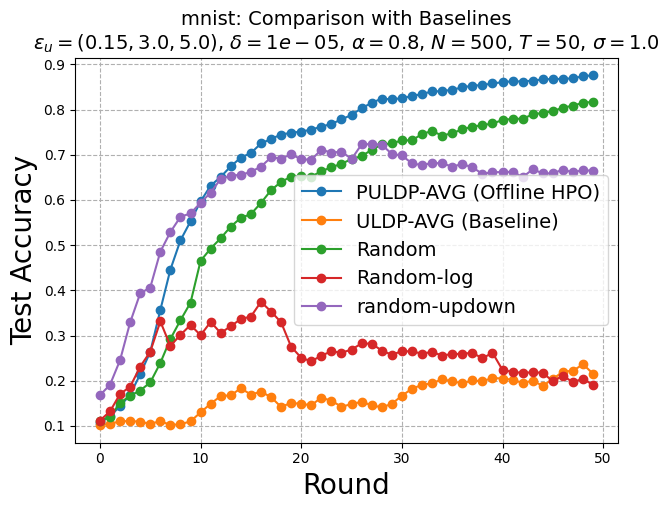

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/comparison-with-baselines-mnist-0.5.png


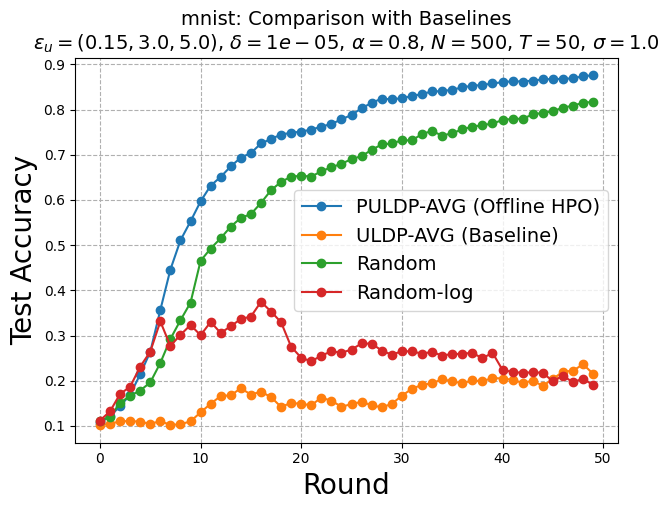

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/comparison-with-baselines-mnist-1.0.png


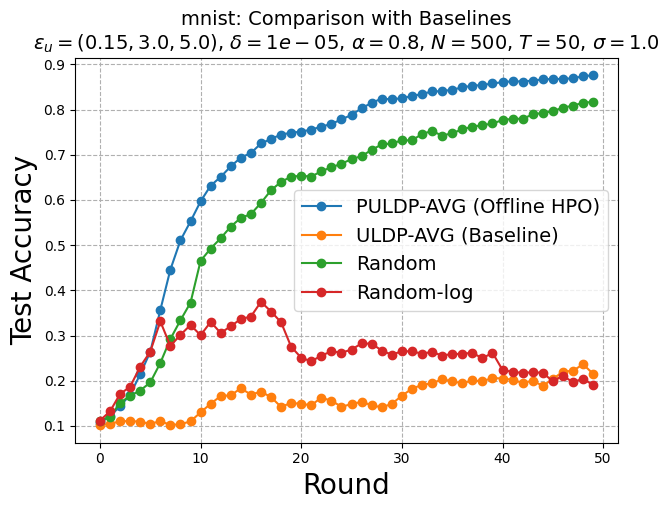

In [23]:
plot_acc_results(fed_sim_params, mnist_all_acc_results, initial_q_u_list=[0.1, 0.5, 1.0], errorbar=False)

### MNIST n=2000

#### QCTrain

online_optimization_68b3809f3d12aed5abe68f2ea9139068.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-PULDP-AVG-QCTrain-0.1-users-2000.png


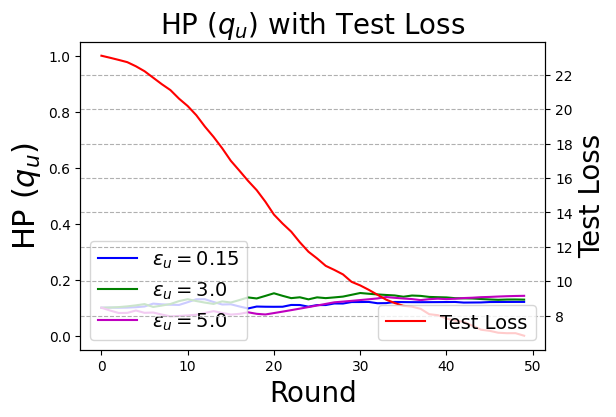

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-mnist-PULDP-AVG-QCTrain-0.1-users-2000.png


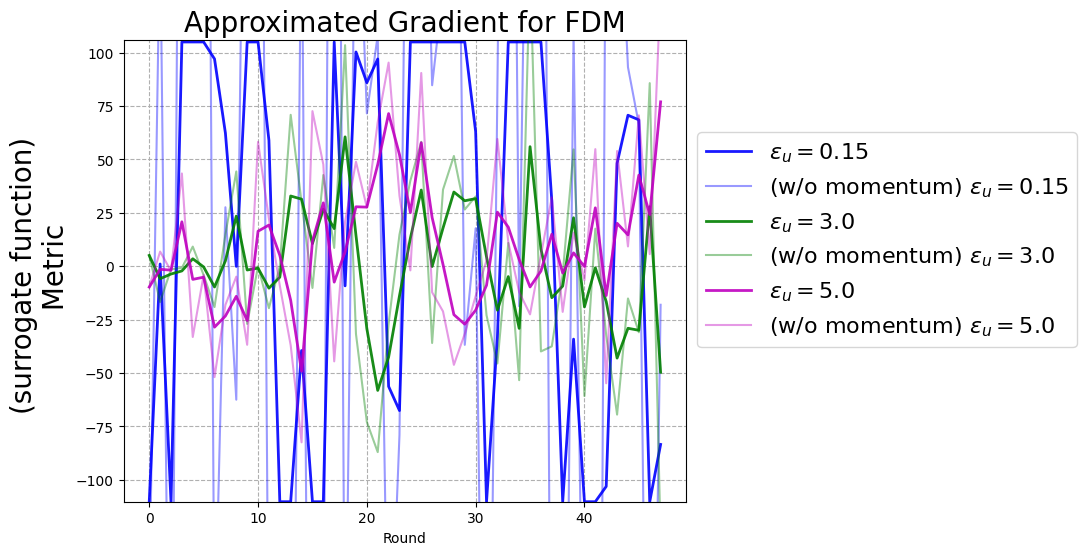

In [24]:
if "mnist_2000_all_acc_results" not in locals():
    mnist_2000_all_acc_results = {}

for momentum_weight in [0.5]:
    fed_sim_params = init_mnist_param(parallelized=True, n_users=2000, times=2, gpu_id=0)
    fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
    fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
    fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
    fed_sim_params.validation_ratio = 0.5
    fed_sim_params.q_step_size = 0.9
    fed_sim_params.momentum_weight = 0.5
    fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"

    initial_q_u_list = [0.1]
    for initial_q_u in initial_q_u_list:
        fed_sim_params.initial_q_u = initial_q_u
        run_online_optimization(fed_sim_params, force_update=False)
        x, acc_means, acc_stds = show_online_optimization_result(
            fed_sim_params,
            errorbar=False,
            img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}-users-{2000}",
        )
    mnist_2000_all_acc_results[(fed_sim_params.agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)

#### PUDLP-AVG

02/15/2024 14:09:34:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-mnist-PULDPAVG-users-2000.png


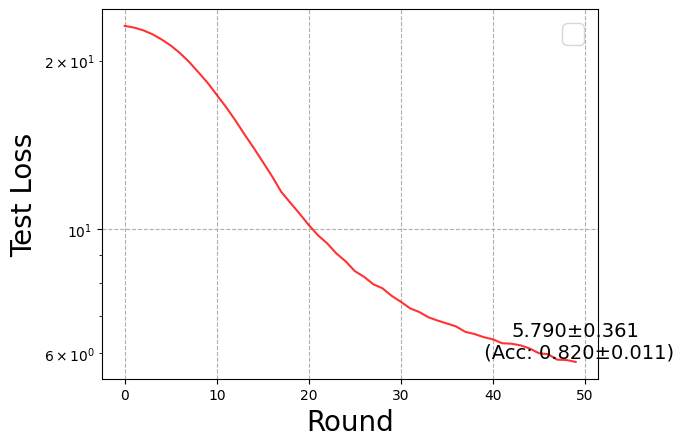

In [2]:
if "mnist_2000_all_acc_results" not in locals():
    mnist_2000_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_mnist_param(
    n_users=2000, parallelized=False)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 2
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.5, 0.25, 0.1, 0.05]
best_idx_per_group = {0.15: 2, 3.0: 3, 5.0: 2}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-PULDPAVG-users-{2000}"
)
mnist_2000_all_acc_results[(fed_sim_params.agg_strategy, "PULDP-AVG (Offline HPO)")] = (x, acc_means, acc_stds)

#### ULDP-AVG

02/15/2024 14:09:39:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-mnist-ULDPAVG-users-2000.png


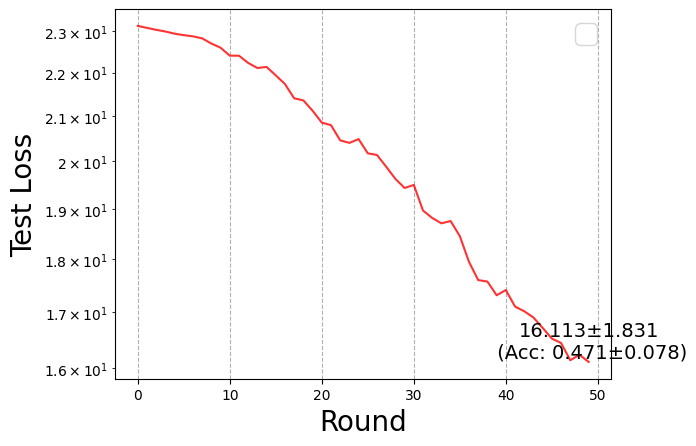

In [3]:
if "mnist_2000_all_acc_results" not in locals():
    mnist_2000_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_mnist_param(
    n_users=2000, eps_u=0.15, parallelized=False)
fed_sim_params.epsilon_list = [0.15]
fed_sim_params.group_thresholds = [0.15]
fed_sim_params.ratio_list = [1.0]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 5
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01, 0.005]
best_idx_per_group = {0.15: 6}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-ULDPAVG-users-{2000}"
)
mnist_2000_all_acc_results[(fed_sim_params.agg_strategy, "ULDP-AVG (Baseline)")] = (x, acc_means, acc_stds)

#### random baselines

online_optimization_a13448c7c05e9653313f9f8aee3f6fdb.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-random-users-2000.png


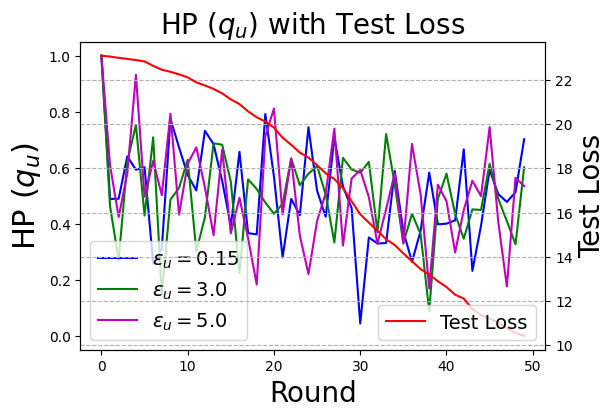

online_optimization_d81b80a49396c46d240da2ebc501a4ab.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-random-log-users-2000.png


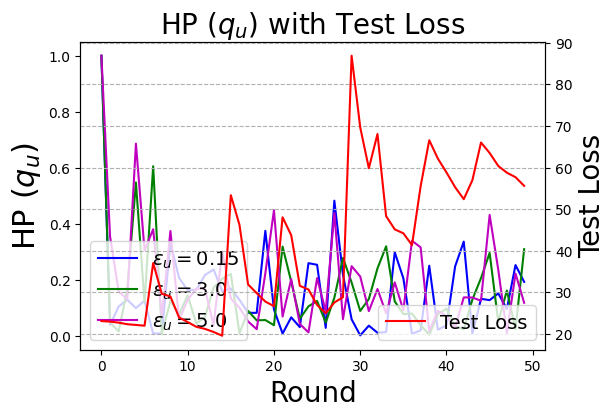

online_optimization_bea5cd5af71903d2db7825657376f5fc.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-0.1-random-updown-users-2000.png


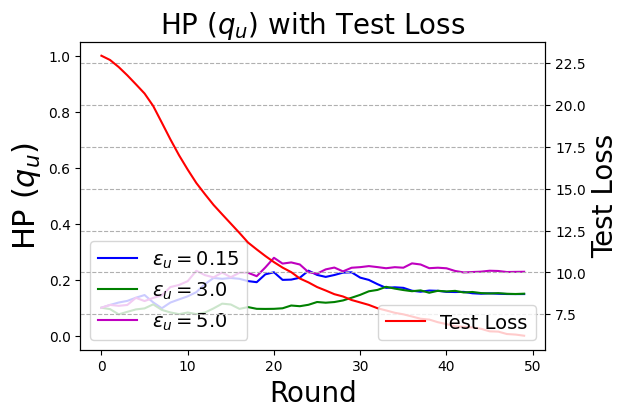

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-mnist-0.1-random-updown-users-2000.png


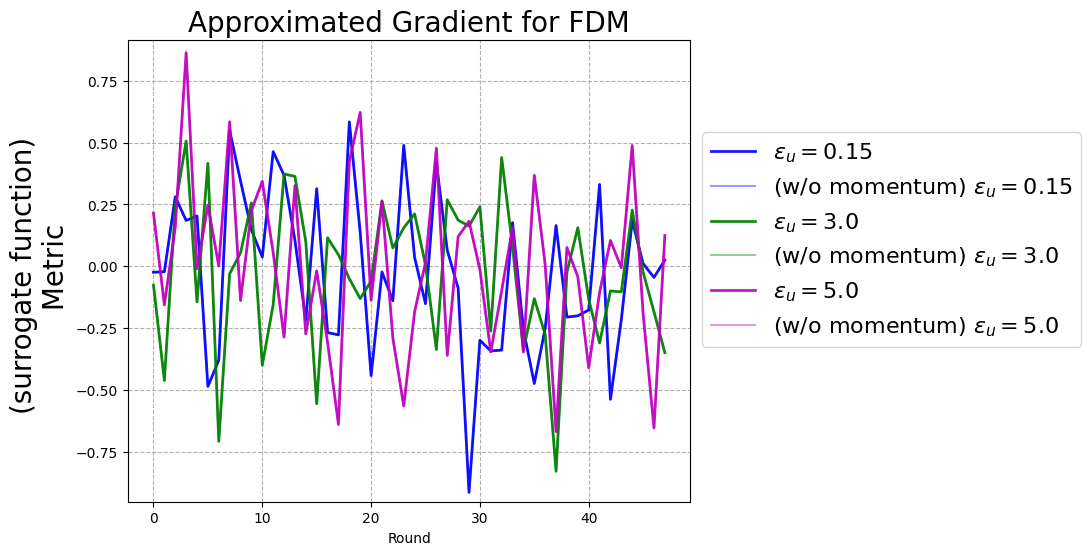

online_optimization_410a4b722be3ea6181867fc765d96173.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-0.5-random-updown-users-2000.png


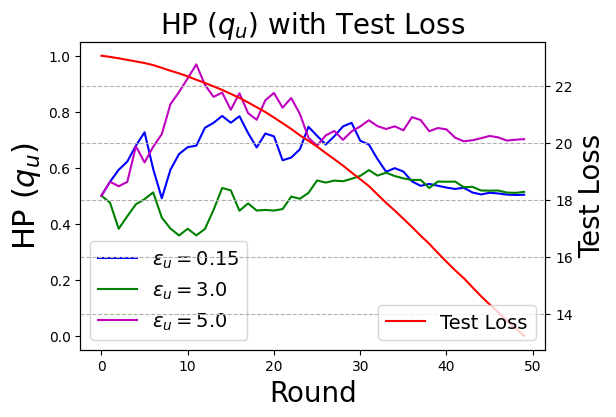

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-mnist-0.5-random-updown-users-2000.png


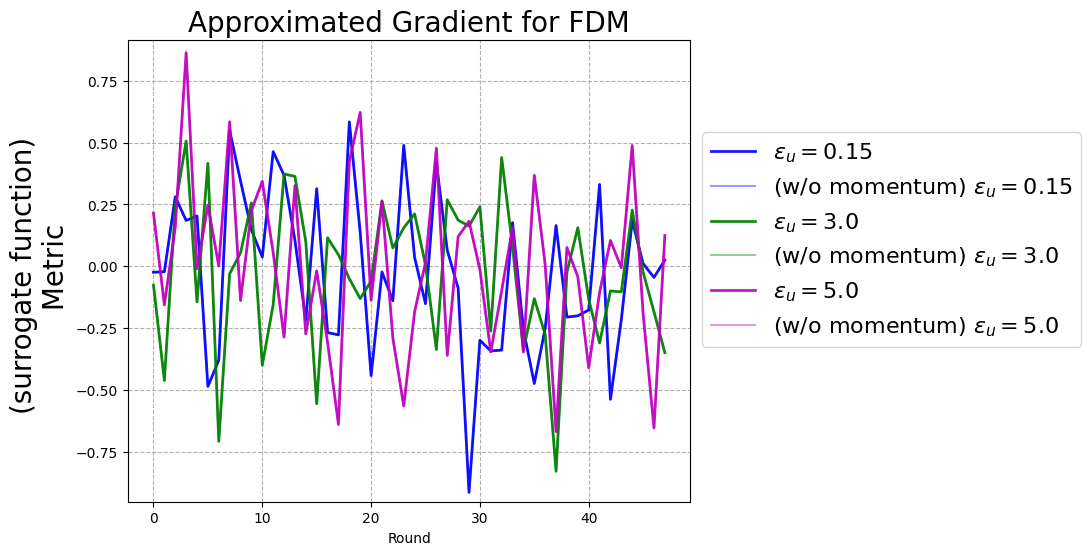

online_optimization_5661d9e1bf4925628481295c6d6ac829.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-mnist-1.0-random-updown-users-2000.png


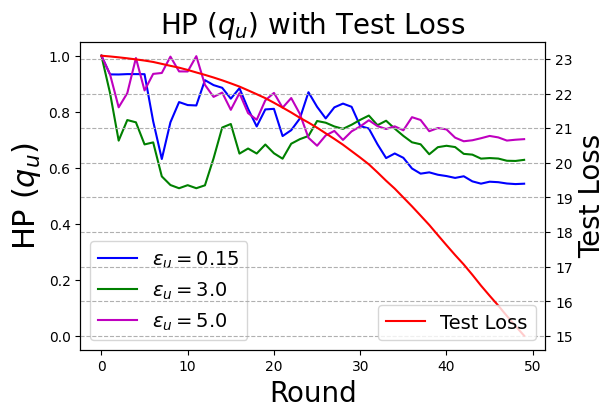

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-mnist-1.0-random-updown-users-2000.png


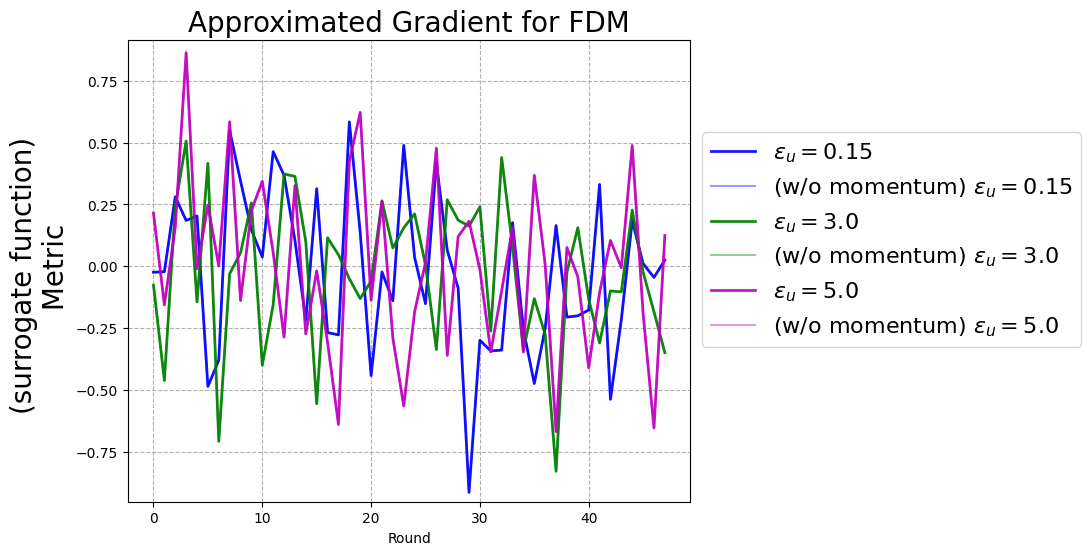

In [31]:
if "mnist_2000_all_acc_results" not in locals():
    mnist_2000_all_acc_results = {}

logger_set_info()
fed_sim_params = init_mnist_param(
    parallelized=True, n_users=2000, times=3, gpu_id=0)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.hp_baseline = "random"

run_online_optimization(fed_sim_params, force_update=False)
x, acc_means, acc_stds = show_online_optimization_result(
    fed_sim_params, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.hp_baseline}-users-{2000}"
)
mnist_2000_all_acc_results[(fed_sim_params.hp_baseline, "Random")] = (x, acc_means, acc_stds)

fed_sim_params = init_mnist_param(
    parallelized=True, n_users=2000, times=3, gpu_id=0)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.hp_baseline = "random-log"

run_online_optimization(fed_sim_params, force_update=False)
x, acc_means, acc_stds = show_online_optimization_result(
    fed_sim_params, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.hp_baseline}-users-{2000}"
)
mnist_2000_all_acc_results[(fed_sim_params.hp_baseline, "Random-log")] = (x, acc_means, acc_stds)

# fed_sim_params = init_mnist_param(parallelized=True, n_users=2000, times=3, gpu_id=0)
# fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
# fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
# fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
# fed_sim_params.validation_ratio = 0.5
# fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
# fed_sim_params.hp_baseline = "random-updown"

# initial_q_u_list = [0.1, 0.5, 1.0]
# for initial_q_u in initial_q_u_list:
#     fed_sim_params.initial_q_u = initial_q_u
#     run_online_optimization(fed_sim_params, force_update=False)
#     x, acc_means, acc_stds = show_online_optimization_result(
#         fed_sim_params,
#         errorbar=False,
#         img_name=f"{fed_sim_params.dataset_name}-{initial_q_u}-{fed_sim_params.hp_baseline}-users-{2000}",
#     )
#     mnist_2000_all_acc_results[(fed_sim_params.hp_baseline, initial_q_u)] = (x, acc_means, acc_stds)

#### Comparison

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/comparison-with-baselines-mnist.png


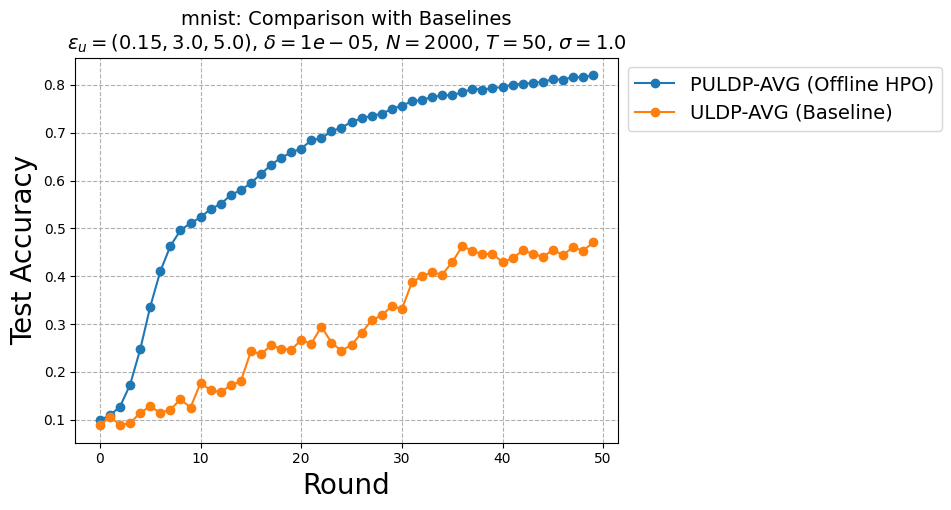

In [4]:
plot_acc_results(fed_sim_params, mnist_2000_all_acc_results, initial_q_u_list=[0.1, 0.5, 1.0], errorbar=False)